In [1]:
import os
import random
from collections import defaultdict, Counter
from statistics import mode

import numpy as np
import pandas as pd
import nibabel
from matplotlib import colors
import matplotlib.style
matplotlib.style.use('ggplot')
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
# import seaborn as sns
import matplotlib
%matplotlib inline
import numpy as np
import nilearn
from nilearn import datasets, plotting, image, surface
import nibabel as nib
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

from neurolang import frontend as fe

/home/amachlou/miniconda3/envs/antonia/lib/python3.6/importlib/_bootstrap.py:205: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/home/amachlou/git/neurolang/neurolang/expression_pattern_matching.py:54: UserWarning: Warning in class FirstOrderLogicSolver overwrites {'existential_predicate', 'universal_predicate'} from base GenericSolver[typing.Any]
  warn(warn_message)
/home/amachlou/miniconda3/envs/antonia/lib/python3.6/importlib/_bootstrap_external.py:426: ImportWarning: Not importing directory /home/amachlou/miniconda3/envs/antonia/lib/python3.6/site-packages/mpl_toolkits: missing __init__
  _warnings.warn(msg.format(portions[0]), ImportWarning)


In [2]:
destrieux_dataset = datasets.fetch_atlas_destrieux_2009()
destrieux_map = nib.load(destrieux_dataset['maps'])
destrieux_dataset['labels']

/home/amachlou/miniconda3/envs/antonia/lib/python3.6/site-packages/numpy/lib/npyio.py:2278: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  output = genfromtxt(fname, **kwargs)


rec.array([(  0, b'Background'), (  1, b'L G_and_S_frontomargin'),
           (  2, b'L G_and_S_occipital_inf'),
           (  3, b'L G_and_S_paracentral'),
           (  4, b'L G_and_S_subcentral'),
           (  5, b'L G_and_S_transv_frontopol'),
           (  6, b'L G_and_S_cingul-Ant'),
           (  7, b'L G_and_S_cingul-Mid-Ant'),
           (  8, b'L G_and_S_cingul-Mid-Post'),
           (  9, b'L G_cingul-Post-dorsal'),
           ( 10, b'L G_cingul-Post-ventral'), ( 11, b'L G_cuneus'),
           ( 12, b'L G_front_inf-Opercular'),
           ( 13, b'L G_front_inf-Orbital'),
           ( 14, b'L G_front_inf-Triangul'), ( 15, b'L G_front_middle'),
           ( 16, b'L G_front_sup'), ( 17, b'L G_Ins_lg_and_S_cent_ins'),
           ( 18, b'L G_insular_short'), ( 19, b'L G_occipital_middle'),
           ( 20, b'L G_occipital_sup'), ( 21, b'L G_oc-temp_lat-fusifor'),
           ( 22, b'L G_oc-temp_med-Lingual'),
           ( 23, b'L G_oc-temp_med-Parahip'), ( 24, b'L G_orbital'),
  

In [3]:
# destr_points = nilearn.surface.vol_to_surf(destrieux_map, '108525.L.pial.32k_fs_LR.surf.gii')

In [4]:
# destr_regions={}

# for label_number, name in destrieux_dataset['labels']:
#     name = name.decode()
#     if not name.startswith('L') or ('S_' not in name and 'G_' not in name and 'Lat_Fis' not in name):
#         continue
#     name = 'L_' + name[2:].replace('-', '_')
    
#     for x in range(1, len(destrieux_dataset['labels'])):    
#         voxels_ijk  = np.transpose((destrieux_map.get_data()==x).nonzero())
#         destr_regions[name]= nib.affines.apply_affine(destrieux_map.affine, voxels_ijk)

In [5]:
surface = nib.load('108525.L.pial.32k_fs_LR.surf.gii')
vertices = surface.darrays[0].data
manual_sulci_gii = nib.load('108525_L_manual_segmentation.func.gii')
manual_sulci = dict()
for darray in manual_sulci_gii.darrays:
    name = darray.meta.metadata['Name']
    name = name[:name.rfind('_')]
    points = vertices[darray.data.nonzero()]
    manual_sulci[name] = points
    print(f"{name}: number of points {points.shape[0]}")

Hippocampal_sulcus: number of points 191
Superior_parietal_sulcus: number of points 48
Intraparietal_sulcus: number of points 246
Frontomarginal_sulcus: number of points 56
Middle_frontal_sulcus: number of points 187
Inferior_frontal_sulcus: number of points 228
Superior_frontal_sulcus: number of points 298
Intermediate_primus_of_Jensen: number of points 115
Retrocalcarine_sulcus: number of points 37
Lunate_sulcus: number of points 31
Lateral_occipital_sulcus: number of points 101
Superior_occipital_sulcus: number of points 131
Inferior_occipital_sulcus: number of points 131
Anterior_occipital_sulcus: number of points 205
Intralingual_sulcus: number of points 62
Collateral_sulcus: number of points 231
Occipitotemporal_sulcus: number of points 252
Orbital_H_shaped_sulcus: number of points 153
Olfactory_sulcus: number of points 120
Temporopolar_sulcus: number of points 49
Inferior_temporal_sulcus: number of points 124
Angular_sulcus: number of points 256
Superior_temporal_sulcus: number 

/home/amachlou/miniconda3/envs/antonia/lib/python3.6/site-packages/nibabel/gifti/parse_gifti_fast.py:62: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  newarr = np.fromstring(zdec, dtype=dt)
/home/amachlou/miniconda3/envs/antonia/lib/python3.6/site-packages/nibabel/gifti/gifti.py:760: ResourceWarning: unclosed file <_io.BufferedReader name='108525.L.pial.32k_fs_LR.surf.gii'>
  parser.parse(fptr=file_map['image'].get_prepare_fileobj('rb'))
/home/amachlou/miniconda3/envs/antonia/lib/python3.6/site-packages/nibabel/gifti/gifti.py:760: ResourceWarning: unclosed file <_io.BufferedReader name='108525_L_manual_segmentation.func.gii'>
  parser.parse(fptr=file_map['image'].get_prepare_fileobj('rb'))


In [6]:
nl = fe.RegionFrontend()

for name, points in manual_sulci.items():
    ijk_points = nib.affines.apply_affine(np.linalg.inv(destrieux_map.affine), points).astype(int)
    region = fe.ExplicitVBR(
        ijk_points,
        destrieux_map.affine,
        img_dim=destrieux_map.shape
    )
    nl.add_region(region, result_symbol_name=f'manual_{name}')
    
# for label_number, name in destrieux_dataset['labels']:
#     name = name.decode()
#     if not name.startswith('L') or ('S_' not in name and 'G_' not in name and 'Lat_Fis' not in name):
#         continue

#     # Create a region object
#     region = nl.create_region(destrieux_map, label=label_number)

#     # Fine tune the symbol name
#     name = 'L_' + name[2:].replace('-', '_')
#     nl.add_region(region, result_symbol_name=name)

In [7]:
Medial_surface = set()
Lateral_surface = set()
Ventral_surface = set()

for manual_sulcus_name in nl.region_names:
    if ('Callosal' in manual_sulcus_name
        or 'pericallosal' in manual_sulcus_name
        or 'subcallosal' in manual_sulcus_name
        or 'arieto_occipital' in manual_sulcus_name
        or 'Cingulate' in manual_sulcus_name
        or 'cingul_' in manual_sulcus_name
        or 'alcarine' in manual_sulcus_name 
        or 'Callosomarginal' in manual_sulcus_name
        or 'Paracingulate' in manual_sulcus_name
        or 'erior_rostral' in manual_sulcus_name
        or 'aracentral' in manual_sulcus_name
        or 'ubparietal' in manual_sulcus_name
        or 'uneal' in manual_sulcus_name
        or 'cuneus' in manual_sulcus_name
        or 'Intralingual' in manual_sulcus_name
        or 'Intralimbic' in manual_sulcus_name
        or 'rectus' in manual_sulcus_name
        or '0002' in manual_sulcus_name
        or '0003' in manual_sulcus_name
        or '0004' in manual_sulcus_name
        or '010.' in manual_sulcus_name
        or '0013' in manual_sulcus_name
        or '0014' in manual_sulcus_name
        or '0016' in manual_sulcus_name
        or '0019' in manual_sulcus_name
        or '0021' in manual_sulcus_name
        or '0025' in manual_sulcus_name
        or '0027' in manual_sulcus_name
        or '0029' in manual_sulcus_name
        or '0030' in manual_sulcus_name
        or '0033' in manual_sulcus_name
        or '0034' in manual_sulcus_name
        or '0038' in manual_sulcus_name
        or '0042' in manual_sulcus_name
        or '0046' in manual_sulcus_name
        or '0053' in manual_sulcus_name
        or '0059' in manual_sulcus_name
        or '0061' in manual_sulcus_name
        or '0063' in manual_sulcus_name        
        or 'Medial_frontal' in manual_sulcus_name):
        Medial_surface.add(nl.symbols[manual_sulcus_name])
    elif ('Central' in manual_sulcus_name
        or '_central' in manual_sulcus_name
        or 'ateral_fissure' in manual_sulcus_name
        or 'Lat_Fis' in manual_sulcus_name
        or 'recentral' in manual_sulcus_name
        or 'ostcentral' in manual_sulcus_name 
        or 'Superior_frontal' in manual_sulcus_name 
        or 'Inferior_frontal' in manual_sulcus_name
        or 'Middle_frontal' in manual_sulcus_name
        or '_front_' in manual_sulcus_name
        or 'rontomargin' in manual_sulcus_name
        or 'frontopol' in manual_sulcus_name
        or 'subcentral' in manual_sulcus_name
        or 'Intraparietal' in manual_sulcus_name
        or 'intrapariet' in manual_sulcus_name
        or 'Jensen' in manual_sulcus_name
        or 'Superior_parietal' in manual_sulcus_name
        or 'parietal_sup' in manual_sulcus_name
        or 'Supramar' in manual_sulcus_name
        or 'Superior_occipital' in manual_sulcus_name
        or 'Inferior_occipital' in manual_sulcus_name 
        or 'Lateral_occipital' in manual_sulcus_name 
        or 'occipital' in manual_sulcus_name
        or 'oc_sup' in manual_sulcus_name
        or 'Lingual' in manual_sulcus_name
        or 'Lunat' in manual_sulcus_name
        or 'Superior_temporal' in manual_sulcus_name
        or 'Inferior_temporal' in manual_sulcus_name
        or 'temp_sup' in manual_sulcus_name
        or '_temporal' in manual_sulcus_name
        or 'Anterior_occipital' in manual_sulcus_name
        or 'Angular' in manual_sulcus_name
        or 'insula' in manual_sulcus_name
        or 'cent_ins' in manual_sulcus_name
        or '0000' in manual_sulcus_name
        or '0005' in manual_sulcus_name
        or '0006' in manual_sulcus_name
        or '0007' in manual_sulcus_name
        or '0009' in manual_sulcus_name
        or '0011' in manual_sulcus_name
        or '0015' in manual_sulcus_name
        or '0018' in manual_sulcus_name
        or '0022' in manual_sulcus_name
        or '0023' in manual_sulcus_name
        or '0026' in manual_sulcus_name
        or '0031' in manual_sulcus_name
        or '0032' in manual_sulcus_name
        or '0035' in manual_sulcus_name
        or '0036' in manual_sulcus_name
        or '0039' in manual_sulcus_name
        or '0041' in manual_sulcus_name
        or '0044' in manual_sulcus_name
        or '0045' in manual_sulcus_name
        or '0047' in manual_sulcus_name
        or '0048' in manual_sulcus_name
        or '0050' in manual_sulcus_name
        or '0055' in manual_sulcus_name
        or '0057' in manual_sulcus_name
        or '0058' in manual_sulcus_name
        or '0060' in manual_sulcus_name
        or '0062' in manual_sulcus_name):
        Lateral_surface.add(nl.symbols[manual_sulcus_name])
    elif ('Occipitotemporal' in manual_sulcus_name
        or 'Collateral' in manual_sulcus_name
        or 'Rhinal' in manual_sulcus_name 
        or 'Parahip' in manual_sulcus_name 
        or 'Hippocampal' in manual_sulcus_name
        or 'Olfactory' in manual_sulcus_name
        or 'Temporopolar' in manual_sulcus_name
        or '0001' in manual_sulcus_name
        or '0028' in manual_sulcus_name
        or '0054' in manual_sulcus_name
        or 'collat' in manual_sulcus_name
        or 'oc_temp_lat' in manual_sulcus_name
        or 'rbital' in manual_sulcus_name):
        Ventral_surface.add(nl.symbols[manual_sulcus_name])
    else:
        print(manual_sulcus_name)

        

lateral_surface = nl.add_region_set(Lateral_surface, name='lateral_surface')
medial_surface = nl.add_region_set(Medial_surface, name='medial_surface')
ventral_surface = nl.add_region_set(Ventral_surface, name='ventral_surface')

In [8]:
star_lines = [
    {
        'y': [0.5, 0.5],
        'z': [0, 1],
        'interval': [3 / 2.0, 2]
    },
    {
        'y': [0, 1],
        'z': [0, 1],
        'interval': [0.5, 3 / 2.0]
    },
    {
        'y': [0, 1],
        'z': [0.5, 0.5],
        'interval': [-0.5, 0.5]
    },
    {
        'y': [0, 1],
        'z': [1, 0],
        'interval': [-3/2.0, -0.5]
    },
]

In [9]:
AI_PS_sulci = set()
Vertical_sulci = set()
PI_AS_sulci = set()
Longitudinal_sulci = set()

In [10]:
def plot_single_sulcus(sulcus_name):
    data = manual_sulci[sulcus_name]
    # only take (y, z) coordinates of sulcus
    data = data[:, 1:]
    data = MinMaxScaler().fit_transform(data)
    y = data[:, 0].reshape(-1, 1)
    z = data[:, 1].reshape(-1, 1)
    lr = LinearRegression().fit(y, z)
    f = lambda u: lr.intercept_ + lr.coef_[0] * u
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111)
    yplot = np.linspace(0, 1)
    for s in star_lines:
        is_the_line = (
            lr.coef_[0] >= s['interval'][0] and
            lr.coef_[0] <= s['interval'][1]
        )
        lw = 2.0 if is_the_line else 1.0
        ls = '-' if is_the_line else '--'
        c = 'b' if is_the_line else 'k'
        ax.plot(s['y'], s['z'], c=c, ls=ls, lw=lw)
    ax.add_artist(
        plt.Circle((0.5, 0.5),
                   0.3,
                   color='k',
                   ls='dashed',
                   fill=False,
                   linewidth=1.0)
    )
    y_coef = lr.coef_[0]
#     if -0.5 > y_coef > -2:
#         print('AI/PS')
#     elif -2 > y_coef > 2:
#         print('Vertical')
#     elif 2 > y_coef > 0.5:
#         print('AS/PI')
#     elif 0.5 > y_coef > -0.5:
#         print('Longitudinal')
    ax.scatter(y, z, marker='.')
    ax.plot(
        yplot,
        f(yplot),
        c='r',
        label='linear_regression: z = {} + {} y'.format(
            lr.intercept_, lr.coef_[0]
        )
    )
    y_coef = lr.coef_[0]
#     print(y_coef)
    for sulc in nl.region_names:
        if sulcus_name in sulc:
            if -0.5 > y_coef > -2:
#                 print('AI/PS')
                AI_PS_sulci.add(nl.symbols[sulc])
            elif -2 > y_coef > 2:
#                 print('Vertical')
                Vertical_sulci.add(nl.symbols[sulc])
            elif 2 > y_coef > 0.5:
#                 print('AS/PI')
                PI_AS_sulci.add(nl.symbols[sulc])
            elif 0.5 > y_coef > -0.5:
#                 print('Longitudinal')
                Longitudinal_sulci.add(nl.symbols[sulc])

    ax.set_xlabel('y')
    ax.set_ylabel('z')
    ax.set_title(f'{sulcus_name} PCA main direction')
    ax.legend()
    ax.set_xlim(-0.1, 1.1)
    ax.set_ylim(-0.1, 1.1)

/home/amachlou/miniconda3/envs/antonia/lib/python3.6/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


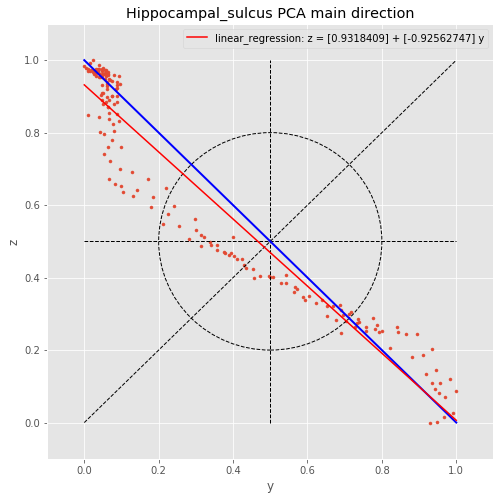

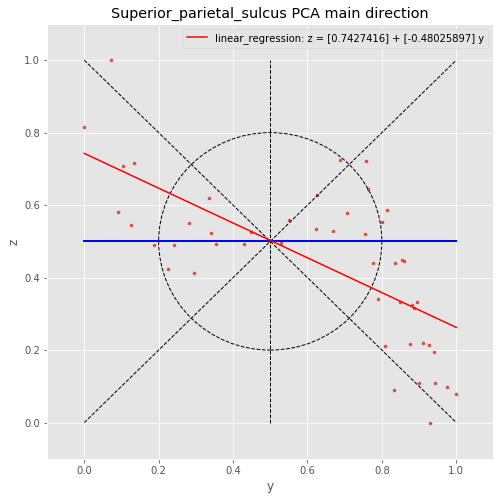

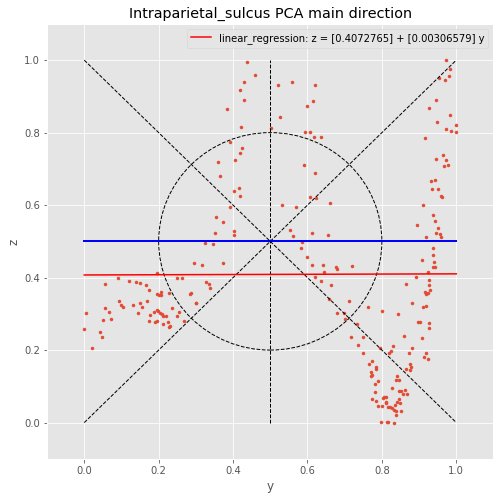

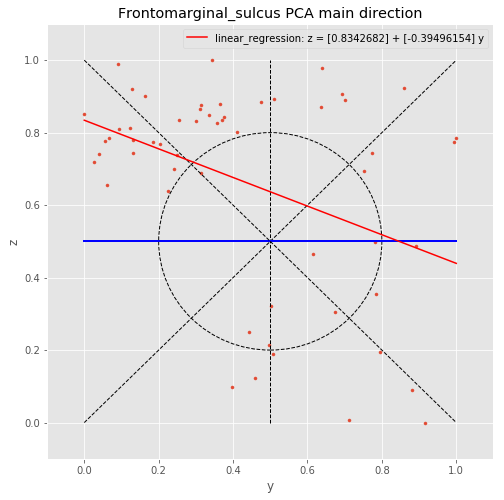

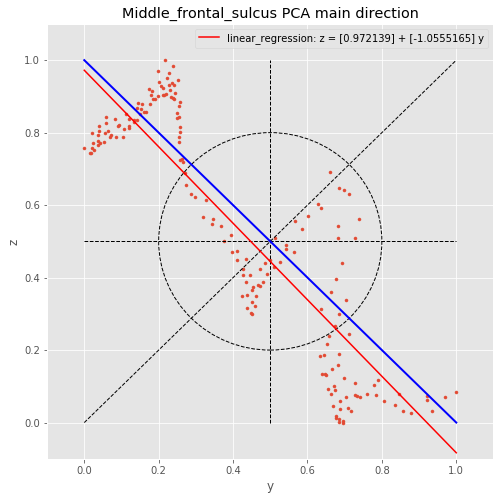

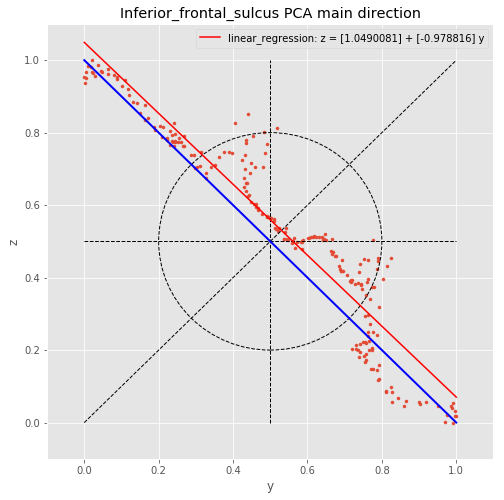

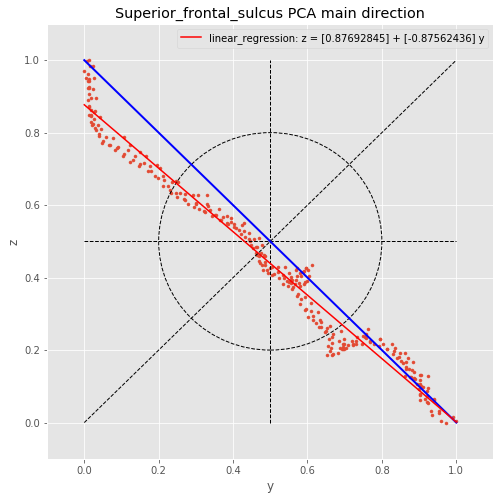

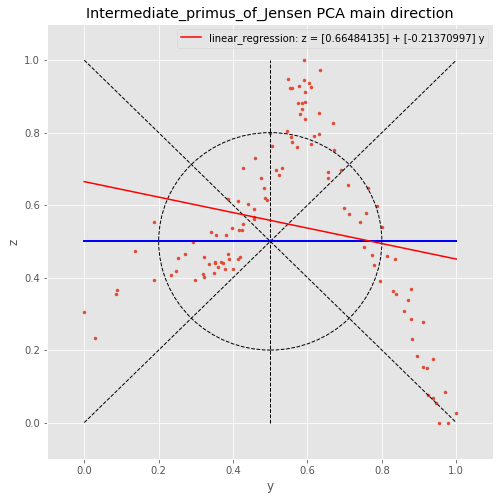

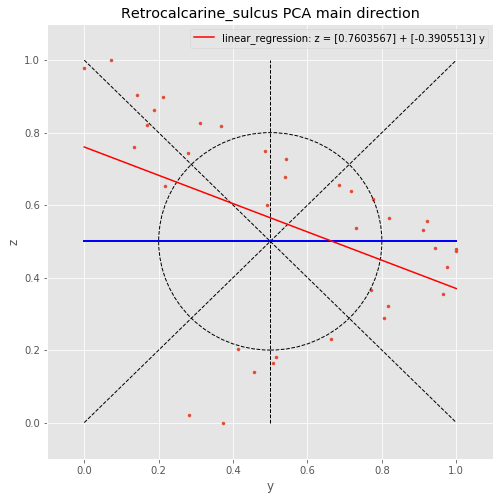

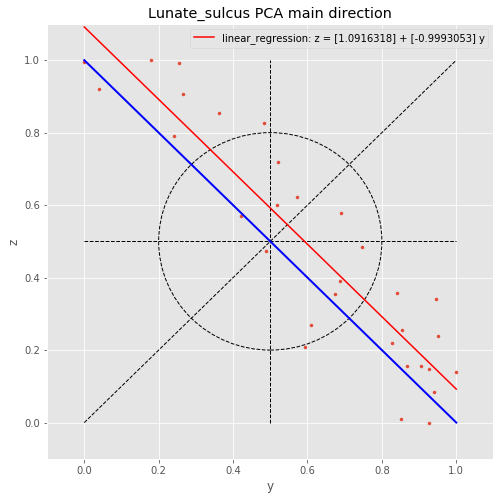

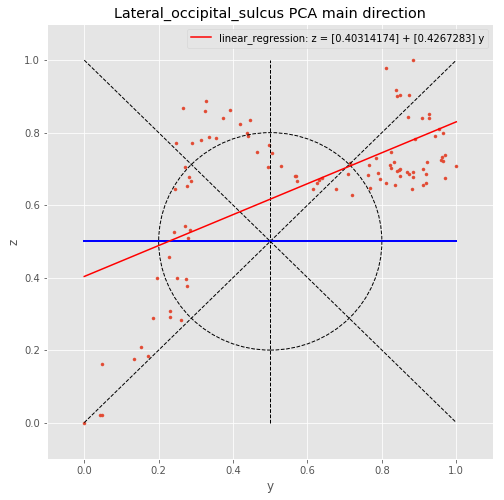

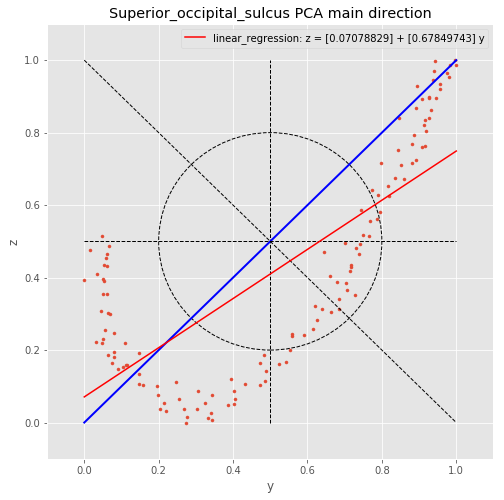

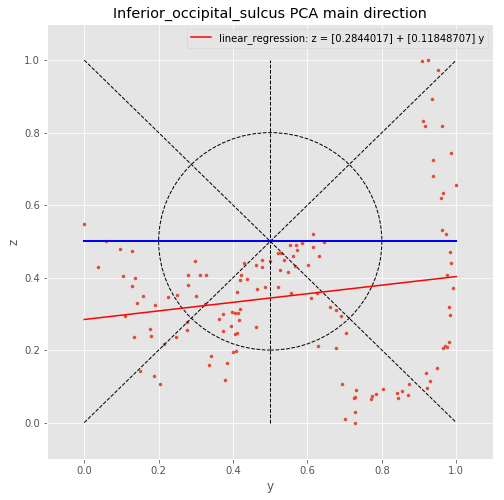

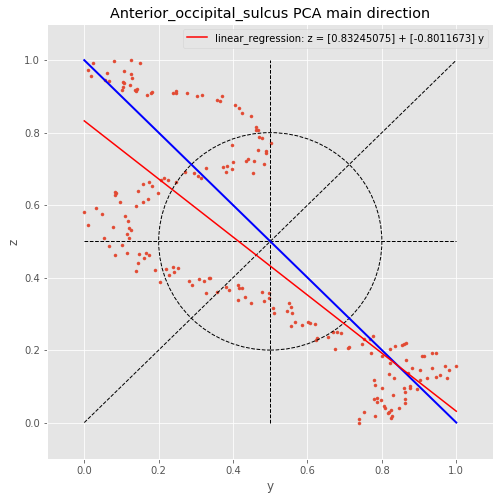

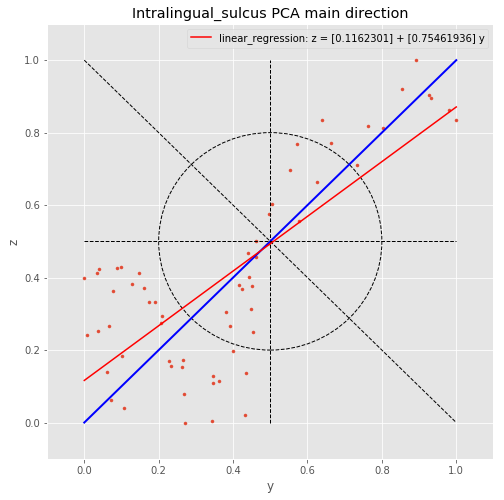

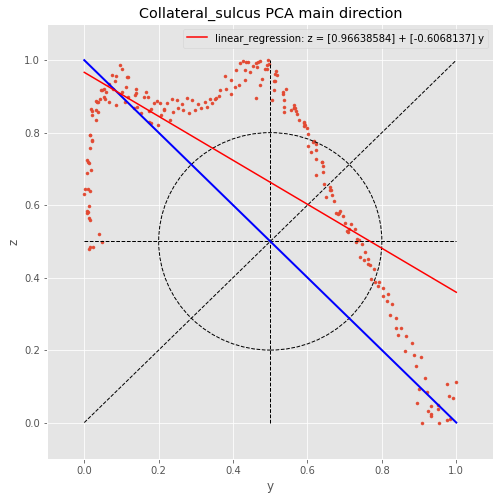

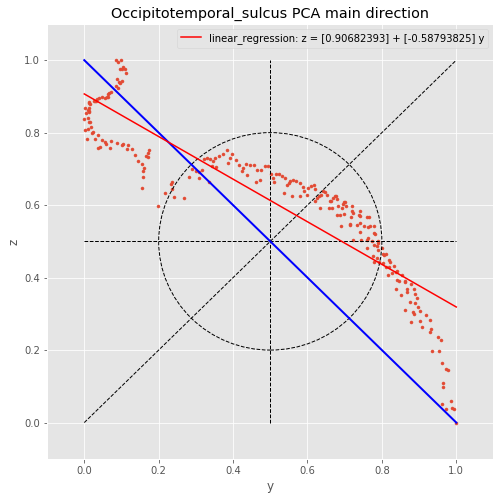

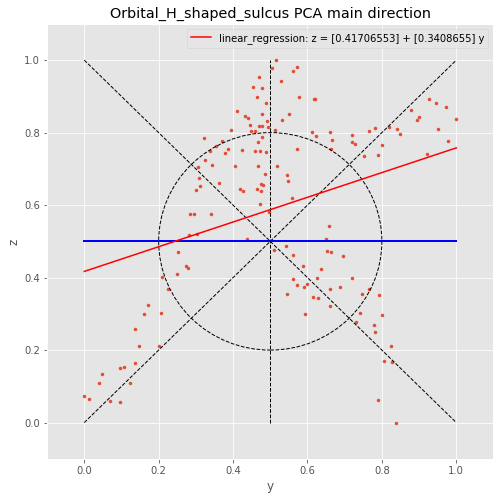

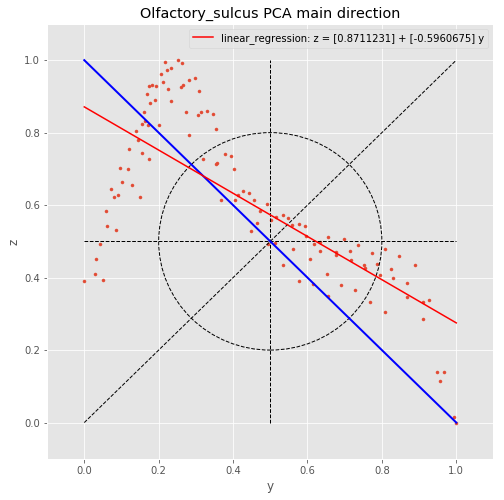

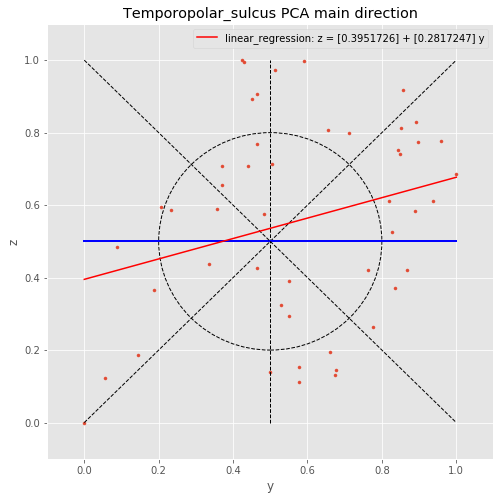

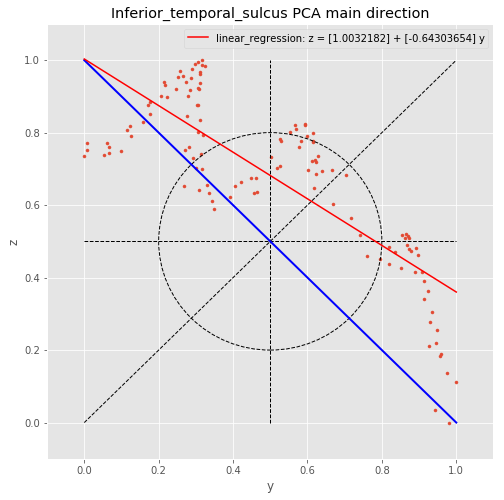

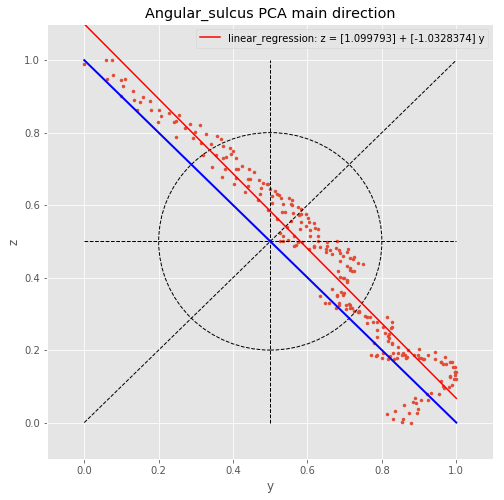

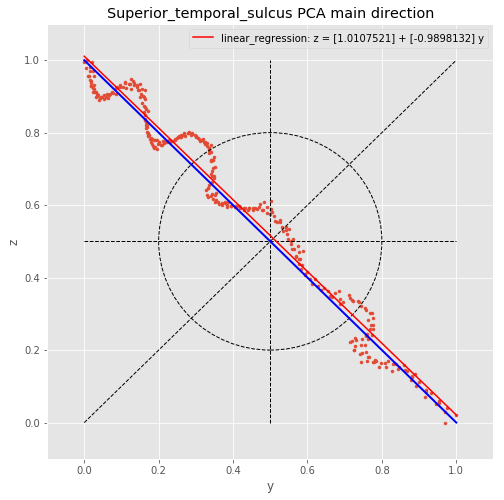

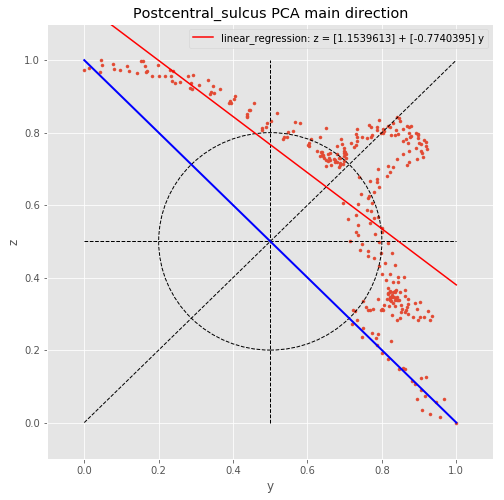

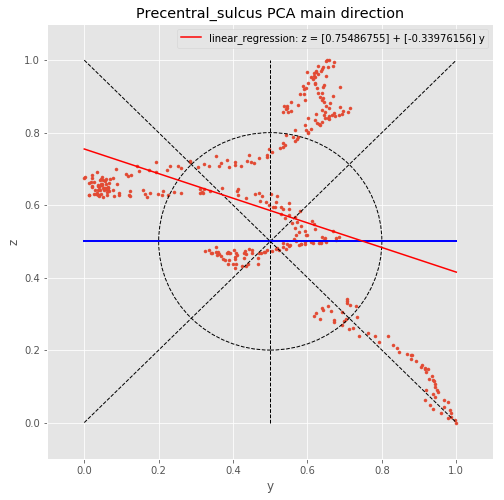

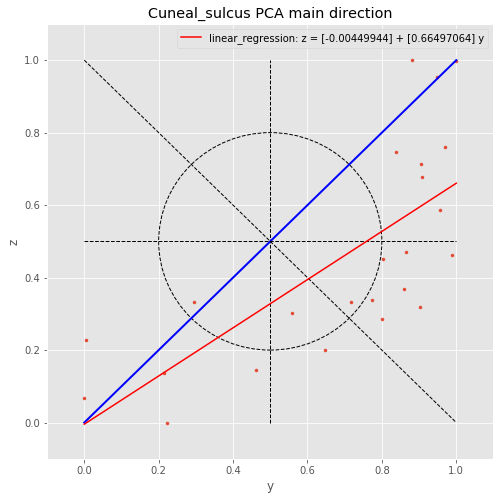

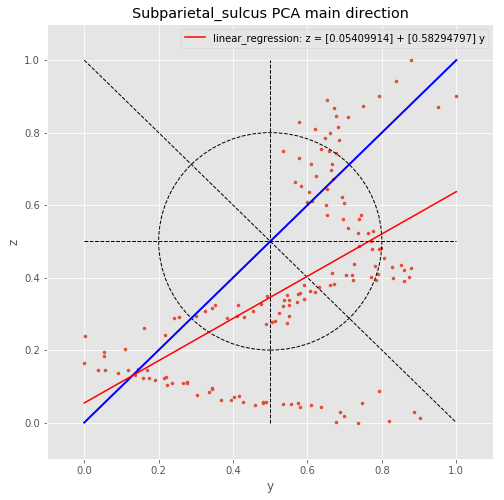

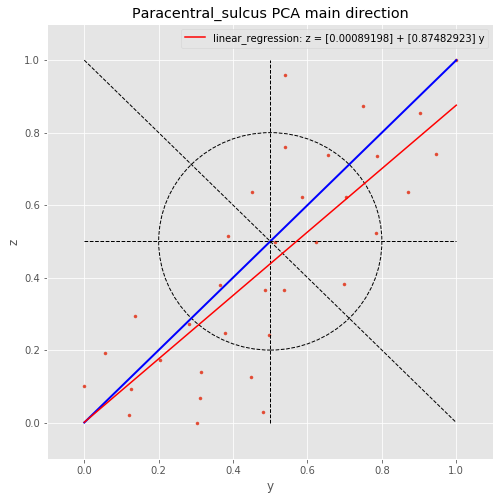

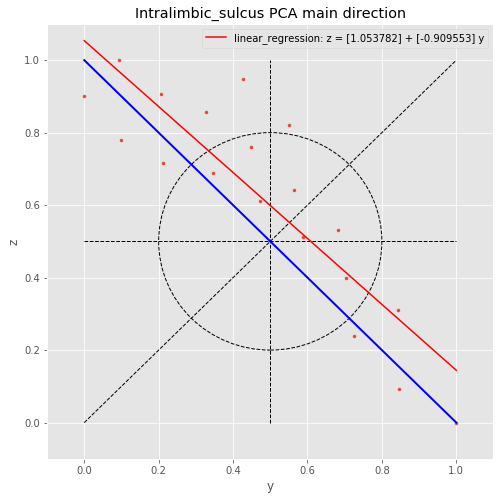

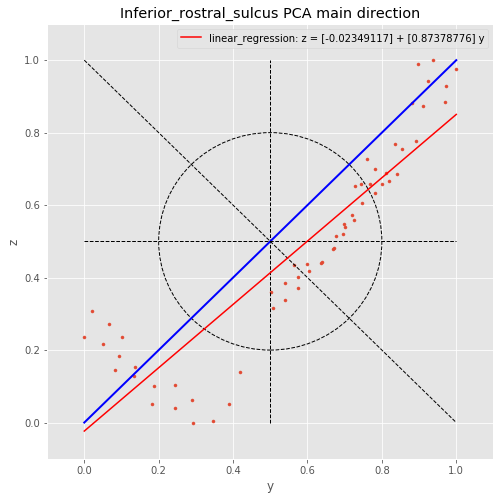

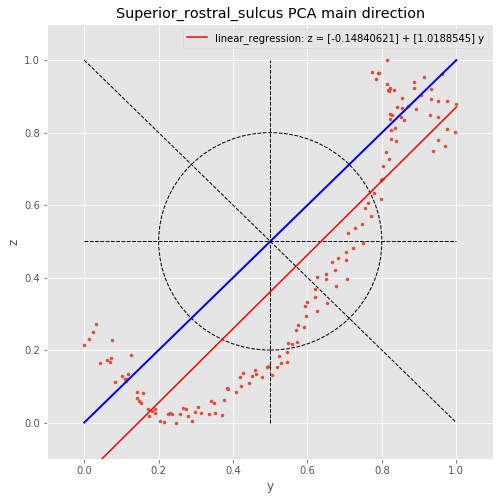

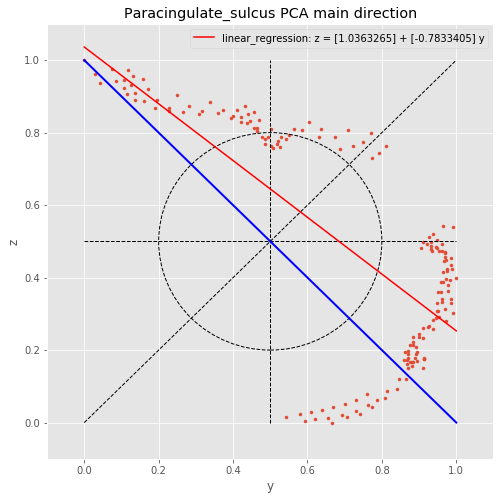

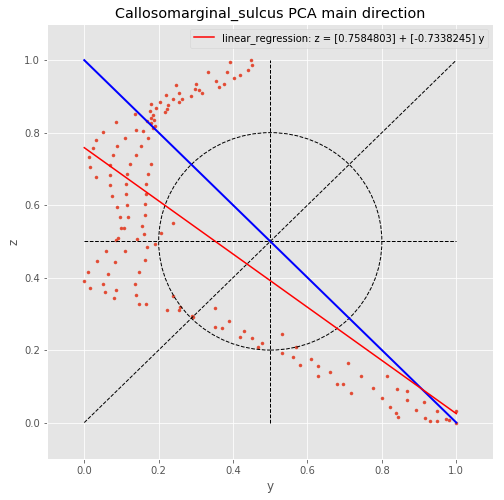

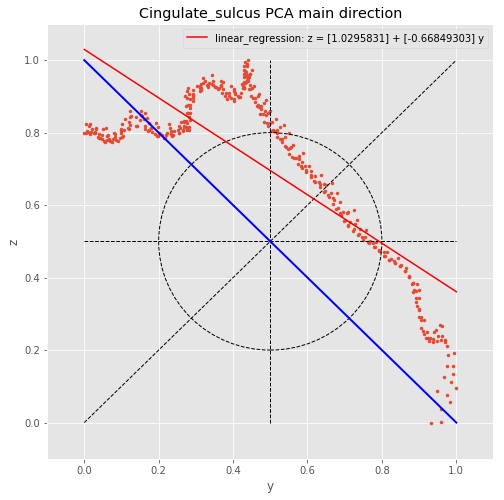

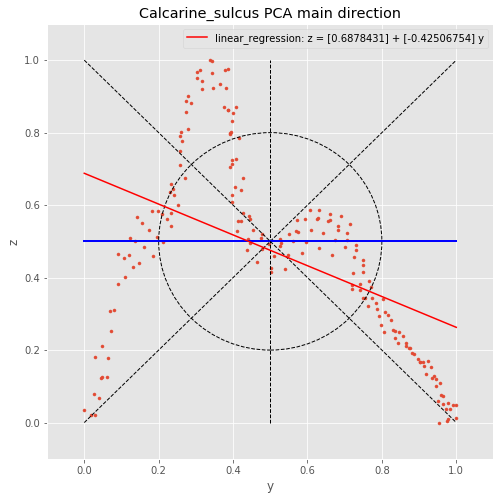

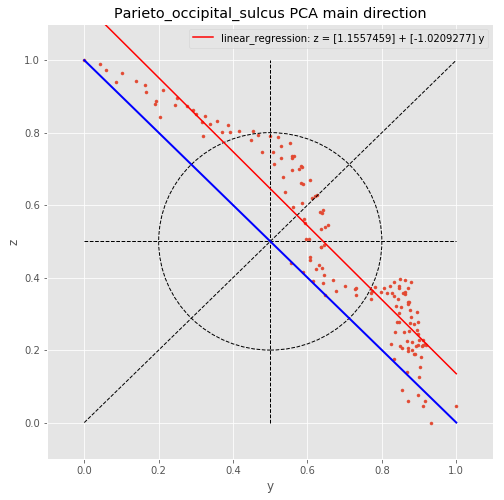

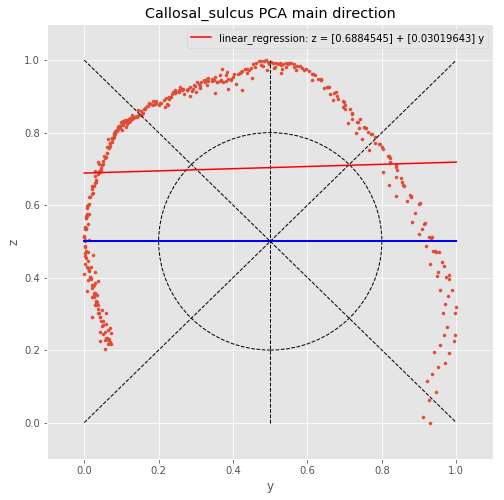

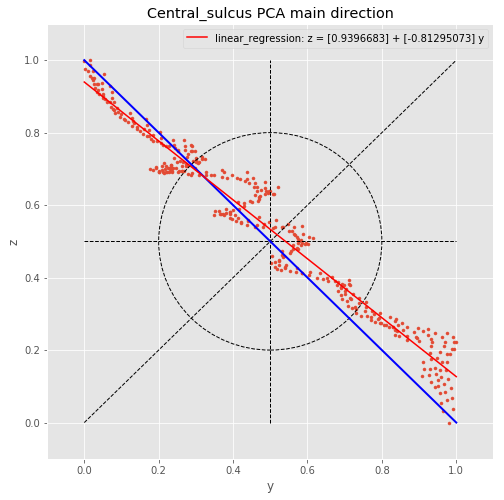

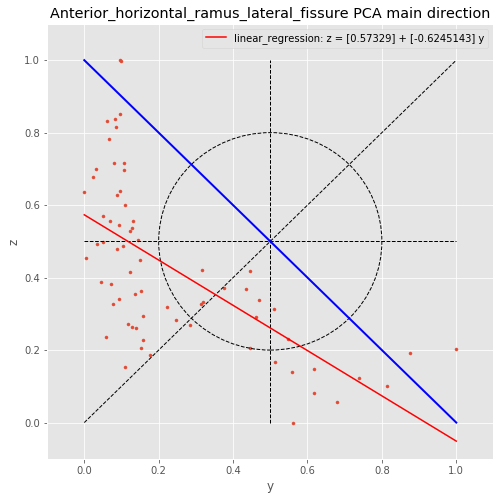

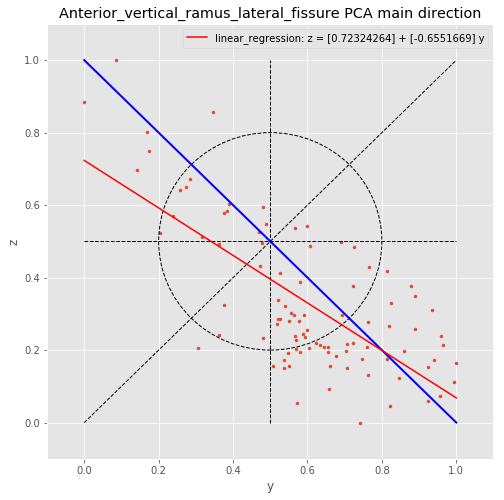

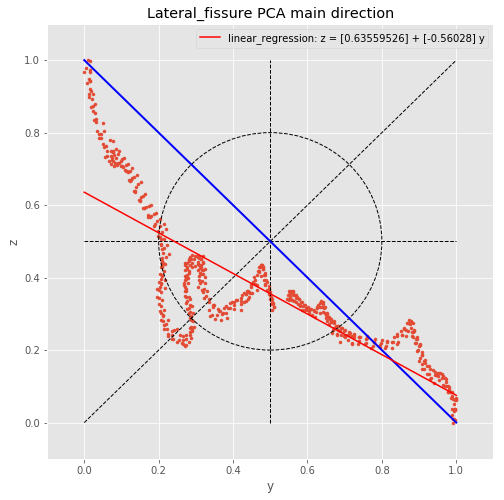

In [11]:
for sulcus_name in manual_sulci.keys():
    plot_single_sulcus(sulcus_name)

In [12]:
anteroinf_posterosup = nl.add_region_set(AI_PS_sulci, name='anteroinf_posterosup')
vertical = nl.add_region_set(Vertical_sulci, name='vertical')
posteroinf_anterosup = nl.add_region_set(PI_AS_sulci, name='posteroinf_anterosup')
longitudinal = nl.add_region_set(Longitudinal_sulci, name='longitudinal')

In [13]:
nl.symbols.posteroinf_anterosup

posteroinf_anterosup: typing.AbstractSet[neurolang.regions.Region] = ['manual_Inferior_rostral_sulcus', 'manual_Superior_rostral_sulcus', 'manual_Superior_occipital_sulcus', 'manual_Subparietal_sulcus', 'manual_Intralingual_sulcus', 'manual_Cuneal_sulcus', 'manual_Paracentral_sulcus']

In [14]:
def tolerance_y_3(ys_origin_sulcus, ys_target_sulcus, length):
    # we consider I the origin
    before=set()
    overlaps=set()
    during=set()
    meets=set()
    starts=set()
    finishes=set()
    equals=set()
    after=set()
    Anterior_of=set()
    Posterior_of=set()
    During=set()
    J_minus = min(ys_target_sulcus)
    J_plus = max(ys_target_sulcus) + length
    
    I_boxes = set(ys_origin_sulcus)
    for x in I_boxes:
        I_minus = x
        I_plus = I_minus + length
        
        if I_minus < I_plus < J_minus < J_plus:
            before.add(x)
        if I_minus < J_minus < I_plus < J_plus:
            overlaps.add(x)
        if J_minus < I_minus < I_plus < J_plus:
            during.add(x)
        if I_minus < I_plus == J_minus < J_plus:
            meets.add(x)
        if I_minus == J_minus < I_plus < J_plus:
            starts.add(x)
        if J_minus < I_minus < I_plus == J_plus:
            finishes.add(x)
        if I_minus == J_minus < I_plus == J_plus:
            equals.add(x)
        if J_minus < J_plus < I_minus < I_plus:
            after.add(x)
    before_pc =  len(before) / len(I_boxes) * 100
    overlaps_pc =  len(overlaps) / len(I_boxes) * 100
    during_pc = len(during) / len(I_boxes) * 100
    meets_pc = len(meets) / len(I_boxes) * 100
    starts_pc = len(starts) / len(I_boxes) * 100
    finishes_pc = len(finishes) / len(I_boxes) * 100
    equals_pc = len(equals) / len(I_boxes) * 100
    after_pc = len(after) / len(I_boxes) * 100     

#     x = np.arange(8)
#     plt.bar(x, height= [before_pc, overlaps_pc, during_pc, meets_pc, starts_pc, finishes_pc, equals_pc, after_pc])
# #     plt.xticks(x+.5, [labels[0], labels[1], labels[2], labels[3], labels[4], labels[5], labels[6], labels[7]])
#     plt.xticks(x+.5, ['before','overlaps','during','meets','starts','finishes','equals','after'])
#     plt.axhline(y=80, color='r', linestyle='--')
#     plt.show()
    values = [before_pc, overlaps_pc, during_pc, meets_pc, starts_pc, finishes_pc, equals_pc, after_pc]
    
    return values

In [15]:
x_labels = ['medial', 'overlaps', 'during_x', 'meets', 'starts', 'finishes', 'equals', 'lateral']
y_labels =  ['anterior', 'overlaps', 'during_y', 'meets', 'starts', 'finishes', 'equals', 'posterior']
z_labels = ['superior', 'overlaps', 'during_z', 'meets', 'starts', 'finishes', 'equals', 'inferior']

In [16]:
def making_dominant_sets_relative_to_primary(primary_sulcus, labels, subject_manual_sulci, axis):
    
    x = nl.new_region_symbol('x')
    q = nl.query(
        x, 
        (
            nl.symbols.anterior_of(x, nl.symbols[f'manual_{primary_sulcus}']) |
            nl.symbols.posterior_of(x, nl.symbols[f'manual_{primary_sulcus}']) |
            nl.symbols.superior_of(x, nl.symbols[f'manual_{primary_sulcus}']) |
            nl.symbols.inferior_of(x, nl.symbols[f'manual_{primary_sulcus}']) |
            nl.symbols.overlapping(x, nl.symbols[f'manual_{primary_sulcus}'])
        )
    )

    res = q.do()

    anterior=set()
    posterior=set()
    during_y=set()
    superior=set()
    inferior=set()
    during_z=set()
    medial=set()
    lateral=set()
    during_x=set()

    for r in res:
        if r.symbol_name.startswith('manual_'):
#             print(r.symbol_name[7:])
            sulcus_relativity = tolerance_y_3(subject_manual_sulci[primary_sulcus].T[axis], subject_manual_sulci[r.symbol_name[7:]].T[axis], length=.1)
            relations=[]
            relations.append(labels[np.argmax(np.array(sulcus_relativity))])
#             keys, counts = np.unique(relations, return_counts=True)
#             plt.bar(keys, counts)
#             print (r.symbol_name[7:], ' is ', mode(relations), primary_sulcus, '\n')
            if mode(relations)=='anterior':
                anterior.add(nl.symbols[r.symbol_name])
            elif mode(relations)=='posterior':
                posterior.add(nl.symbols[r.symbol_name])
            elif mode(relations)=='during_y':
                during_y.add(nl.symbols[r.symbol_name])
            elif mode(relations)=='superior':
                superior.add(nl.symbols[r.symbol_name])
            elif mode(relations)=='inferior':
                inferior.add(nl.symbols[r.symbol_name])
            elif mode(relations)=='during_z':
                during_z.add(nl.symbols[r.symbol_name])
            elif mode(relations)=='medial':
                medial.add(nl.symbols[r.symbol_name])
            elif mode(relations)=='lateral':
                lateral.add(nl.symbols[r.symbol_name])
            elif mode(relations)=='during_x':
                during_x.add(nl.symbols[r.symbol_name])
            else:
                continue
#         elif r.symbol_name.startswith('L_'):
# #             print(r.symbol_name)
#             sulcus_relativity = tolerance_y_3(subject_manual_sulci[primary_sulcus].T[axis], destr_regions[r.symbol_name].T[axis], length=.1)
#             relations=[]
#             relations.append(labels[np.argmax(np.array(sulcus_relativity))])
# #             keys, counts = np.unique(relations, return_counts=True)
# #             plt.bar(keys, counts)
# #             print (r.symbol_name, ' is ', mode(relations), atlas_region, '\n')
#             if mode(relations)=='anterior':
#                 anterior.add(nl.symbols[r.symbol_name])
#             elif mode(relations)=='posterior':
#                 posterior.add(nl.symbols[r.symbol_name])
#             elif mode(relations)=='during_y':
#                 during_y.add(nl.symbols[r.symbol_name])
#             elif mode(relations)=='superior':
#                 superior.add(nl.symbols[r.symbol_name])
#             elif mode(relations)=='inferior':
#                 inferior.add(nl.symbols[r.symbol_name])
#             elif mode(relations)=='during_z':
#                 during_z.add(nl.symbols[r.symbol_name])
#             elif mode(relations)=='medial':
#                 medial.add(nl.symbols[r.symbol_name])
#             elif mode(relations)=='lateral':
#                 lateral.add(nl.symbols[r.symbol_name])
#             elif mode(relations)=='during_x':
#                 during_x.add(nl.symbols[r.symbol_name])
#             else:
#                 continue
#         print('medial', medial)
#         print('lateral', lateral)
#         print('during_x', during_x)
    
        if axis==1:
            anterior_dominant = nl.add_region_set(anterior, name=f'{primary_sulcus}_anterior_dominant')
            posterior_dominant = nl.add_region_set(posterior, name=f'{primary_sulcus}_posterior_dominant')
            during_y_dominant = nl.add_region_set(during_y, name=f'{primary_sulcus}_during_y_dominant')
        elif axis==2:
            superior_dominant = nl.add_region_set(superior, name=f'{primary_sulcus}_superior_dominant')
            inferior_dominant = nl.add_region_set(inferior, name=f'{primary_sulcus}_inferior_dominant')
            during_z_dominant = nl.add_region_set(during_z, name=f'{primary_sulcus}_during_z_dominant')
        elif axis==0:
            medial_dominant = nl.add_region_set(medial, name=f'{primary_sulcus}_medial_dominant')
            lateral_dominant = nl.add_region_set(lateral, name=f'{primary_sulcus}_lateral_dominant')
            during_x_dominant = nl.add_region_set(during_x, name=f'{primary_sulcus}_during_x_dominant')

#### Primary sulci relations

In [17]:
cs_x_relations = making_dominant_sets_relative_to_primary('Central_sulcus', x_labels, manual_sulci, axis=0)
cs_y_relations = making_dominant_sets_relative_to_primary('Central_sulcus', y_labels, manual_sulci, axis=1)
cs_z_relations = making_dominant_sets_relative_to_primary('Central_sulcus', z_labels, manual_sulci, axis=2)

/home/amachlou/git/neurolang/neurolang/regions.py:218: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  np.all(self.voxels == other.voxels))


In [18]:
lf_x_relations = making_dominant_sets_relative_to_primary('Lateral_fissure', x_labels, manual_sulci, axis=0)
lf_y_relations = making_dominant_sets_relative_to_primary('Lateral_fissure', y_labels, manual_sulci, axis=1)
lf_z_relations = making_dominant_sets_relative_to_primary('Lateral_fissure', z_labels, manual_sulci, axis=2)

/home/amachlou/git/neurolang/neurolang/regions.py:218: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  np.all(self.voxels == other.voxels))


In [19]:
pos_x_relations = making_dominant_sets_relative_to_primary('Parieto_occipital_sulcus', x_labels, manual_sulci, axis=0)
pos_y_relations = making_dominant_sets_relative_to_primary('Parieto_occipital_sulcus', y_labels, manual_sulci, axis=1)
pos_z_relations = making_dominant_sets_relative_to_primary('Parieto_occipital_sulcus', z_labels, manual_sulci, axis=2)

/home/amachlou/git/neurolang/neurolang/regions.py:218: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  np.all(self.voxels == other.voxels))


In [20]:
call_x_relations = making_dominant_sets_relative_to_primary('Callosal_sulcus', x_labels, manual_sulci, axis=0)
call_y_relations = making_dominant_sets_relative_to_primary('Callosal_sulcus', y_labels, manual_sulci, axis=1)
call_z_relations = making_dominant_sets_relative_to_primary('Callosal_sulcus', z_labels, manual_sulci, axis=2)

/home/amachlou/git/neurolang/neurolang/regions.py:218: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  np.all(self.voxels == other.voxels))


In [21]:
calc_x_relations = making_dominant_sets_relative_to_primary('Calcarine_sulcus', x_labels, manual_sulci, axis=0)
calc_y_relations = making_dominant_sets_relative_to_primary('Calcarine_sulcus', y_labels, manual_sulci, axis=1)
calc_z_relations = making_dominant_sets_relative_to_primary('Calcarine_sulcus', z_labels, manual_sulci, axis=2)

/home/amachlou/git/neurolang/neurolang/regions.py:218: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  np.all(self.voxels == other.voxels))


In [22]:
ahrlf_x_relations = making_dominant_sets_relative_to_primary('Anterior_horizontal_ramus_lateral_fissure', x_labels, manual_sulci, axis=0)
ahrlf_y_relations = making_dominant_sets_relative_to_primary('Anterior_horizontal_ramus_lateral_fissure', y_labels, manual_sulci, axis=1)
ahrlf_z_relations = making_dominant_sets_relative_to_primary('Anterior_horizontal_ramus_lateral_fissure', z_labels, manual_sulci, axis=2)

/home/amachlou/git/neurolang/neurolang/regions.py:218: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  np.all(self.voxels == other.voxels))


In [23]:
avrlf_x_relations = making_dominant_sets_relative_to_primary('Anterior_vertical_ramus_lateral_fissure', x_labels, manual_sulci, axis=0)
avrlf_y_relations = making_dominant_sets_relative_to_primary('Anterior_vertical_ramus_lateral_fissure', y_labels, manual_sulci, axis=1)
avrlf_z_relations = making_dominant_sets_relative_to_primary('Anterior_vertical_ramus_lateral_fissure', z_labels, manual_sulci, axis=2)

/home/amachlou/git/neurolang/neurolang/regions.py:218: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  np.all(self.voxels == other.voxels))


#### Secondary sulci relations

In [24]:
prcs_x_relations = making_dominant_sets_relative_to_primary('Precentral_sulcus', x_labels, manual_sulci, axis=0)
prcs_y_relations = making_dominant_sets_relative_to_primary('Precentral_sulcus', y_labels, manual_sulci, axis=1)
prcs_z_relations = making_dominant_sets_relative_to_primary('Precentral_sulcus', z_labels, manual_sulci, axis=2)

/home/amachlou/git/neurolang/neurolang/regions.py:218: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  np.all(self.voxels == other.voxels))


In [25]:
cing_x_relations = making_dominant_sets_relative_to_primary('Cingulate_sulcus', x_labels, manual_sulci, axis=0)
cing_y_relations = making_dominant_sets_relative_to_primary('Cingulate_sulcus', y_labels, manual_sulci, axis=1)
cing_z_relations = making_dominant_sets_relative_to_primary('Cingulate_sulcus', z_labels, manual_sulci, axis=2)

/home/amachlou/git/neurolang/neurolang/regions.py:218: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  np.all(self.voxels == other.voxels))


In [26]:
marg_x_relations = making_dominant_sets_relative_to_primary('Callosomarginal_sulcus', x_labels, manual_sulci, axis=0)
marg_y_relations = making_dominant_sets_relative_to_primary('Callosomarginal_sulcus', y_labels, manual_sulci, axis=1)
marg_z_relations = making_dominant_sets_relative_to_primary('Callosomarginal_sulcus', z_labels, manual_sulci, axis=2)

/home/amachlou/git/neurolang/neurolang/regions.py:218: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  np.all(self.voxels == other.voxels))


In [27]:
subp_x_relations = making_dominant_sets_relative_to_primary('Subparietal_sulcus', x_labels, manual_sulci, axis=0)
subp_y_relations = making_dominant_sets_relative_to_primary('Subparietal_sulcus', y_labels, manual_sulci, axis=1)
subp_z_relations = making_dominant_sets_relative_to_primary('Subparietal_sulcus', z_labels, manual_sulci, axis=2)

/home/amachlou/git/neurolang/neurolang/regions.py:218: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  np.all(self.voxels == other.voxels))


In [28]:
srs_x_relations = making_dominant_sets_relative_to_primary('Superior_rostral_sulcus', x_labels, manual_sulci, axis=0)
srs_y_relations = making_dominant_sets_relative_to_primary('Superior_rostral_sulcus', y_labels, manual_sulci, axis=1)
srs_z_relations = making_dominant_sets_relative_to_primary('Superior_rostral_sulcus', z_labels, manual_sulci, axis=2)

/home/amachlou/git/neurolang/neurolang/regions.py:218: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  np.all(self.voxels == other.voxels))


In [29]:
pocs_x_relations = making_dominant_sets_relative_to_primary('Postcentral_sulcus', x_labels, manual_sulci, axis=0)
pocs_y_relations = making_dominant_sets_relative_to_primary('Postcentral_sulcus', y_labels, manual_sulci, axis=1)
pocs_z_relations = making_dominant_sets_relative_to_primary('Postcentral_sulcus', z_labels, manual_sulci, axis=2)

/home/amachlou/git/neurolang/neurolang/regions.py:218: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  np.all(self.voxels == other.voxels))


In [30]:
sts_x_relations = making_dominant_sets_relative_to_primary('Superior_temporal_sulcus', x_labels, manual_sulci, axis=0)
sts_y_relations = making_dominant_sets_relative_to_primary('Superior_temporal_sulcus', y_labels, manual_sulci, axis=1)
sts_z_relations = making_dominant_sets_relative_to_primary('Superior_temporal_sulcus', z_labels, manual_sulci, axis=2)

/home/amachlou/git/neurolang/neurolang/regions.py:218: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  np.all(self.voxels == other.voxels))


In [31]:
ang_x_relations = making_dominant_sets_relative_to_primary('Angular_sulcus', x_labels, manual_sulci, axis=0)
ang_y_relations = making_dominant_sets_relative_to_primary('Angular_sulcus', y_labels, manual_sulci, axis=1)
ang_z_relations = making_dominant_sets_relative_to_primary('Angular_sulcus', z_labels, manual_sulci, axis=2)

/home/amachlou/git/neurolang/neurolang/regions.py:218: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  np.all(self.voxels == other.voxels))


In [32]:
ips_x_relations = making_dominant_sets_relative_to_primary('Intraparietal_sulcus', x_labels, manual_sulci, axis=0)
ips_y_relations = making_dominant_sets_relative_to_primary('Intraparietal_sulcus', y_labels, manual_sulci, axis=1)
ips_z_relations = making_dominant_sets_relative_to_primary('Intraparietal_sulcus', z_labels, manual_sulci, axis=2)

/home/amachlou/git/neurolang/neurolang/regions.py:218: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  np.all(self.voxels == other.voxels))


In [33]:
ipoj_x_relations = making_dominant_sets_relative_to_primary('Intermediate_primus_of_Jensen', x_labels, manual_sulci, axis=0)
ipoj_y_relations = making_dominant_sets_relative_to_primary('Intermediate_primus_of_Jensen', y_labels, manual_sulci, axis=1)
ipoj_z_relations = making_dominant_sets_relative_to_primary('Intermediate_primus_of_Jensen', z_labels, manual_sulci, axis=2)

/home/amachlou/git/neurolang/neurolang/regions.py:218: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  np.all(self.voxels == other.voxels))


In [34]:
its_x_relations = making_dominant_sets_relative_to_primary('Inferior_temporal_sulcus', x_labels, manual_sulci, axis=0)
its_y_relations = making_dominant_sets_relative_to_primary('Inferior_temporal_sulcus', y_labels, manual_sulci, axis=1)
its_z_relations = making_dominant_sets_relative_to_primary('Inferior_temporal_sulcus', z_labels, manual_sulci, axis=2)

/home/amachlou/git/neurolang/neurolang/regions.py:218: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  np.all(self.voxels == other.voxels))


In [35]:
sos_x_relations = making_dominant_sets_relative_to_primary('Superior_occipital_sulcus', x_labels, manual_sulci, axis=0)
sos_y_relations = making_dominant_sets_relative_to_primary('Superior_occipital_sulcus', y_labels, manual_sulci, axis=1)
sos_z_relations = making_dominant_sets_relative_to_primary('Superior_occipital_sulcus', z_labels, manual_sulci, axis=2)

/home/amachlou/git/neurolang/neurolang/regions.py:218: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  np.all(self.voxels == other.voxels))


In [36]:
ios_x_relations = making_dominant_sets_relative_to_primary('Inferior_occipital_sulcus', x_labels, manual_sulci, axis=0)
ios_y_relations = making_dominant_sets_relative_to_primary('Inferior_occipital_sulcus', y_labels, manual_sulci, axis=1)
ios_z_relations = making_dominant_sets_relative_to_primary('Inferior_occipital_sulcus', z_labels, manual_sulci, axis=2)

/home/amachlou/git/neurolang/neurolang/regions.py:218: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  np.all(self.voxels == other.voxels))


In [37]:
sfs_x_relations = making_dominant_sets_relative_to_primary('Superior_frontal_sulcus', x_labels, manual_sulci, axis=0)
sfs_y_relations = making_dominant_sets_relative_to_primary('Superior_frontal_sulcus', y_labels, manual_sulci, axis=1)
sfs_z_relations = making_dominant_sets_relative_to_primary('Superior_frontal_sulcus', z_labels, manual_sulci, axis=2)

/home/amachlou/git/neurolang/neurolang/regions.py:218: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  np.all(self.voxels == other.voxels))


In [38]:
ifs_x_relations = making_dominant_sets_relative_to_primary('Inferior_frontal_sulcus', x_labels, manual_sulci, axis=0)
ifs_y_relations = making_dominant_sets_relative_to_primary('Inferior_frontal_sulcus', y_labels, manual_sulci, axis=1)
ifs_z_relations = making_dominant_sets_relative_to_primary('Inferior_frontal_sulcus', z_labels, manual_sulci, axis=2)

/home/amachlou/git/neurolang/neurolang/regions.py:218: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  np.all(self.voxels == other.voxels))


In [39]:
olf_x_relations = making_dominant_sets_relative_to_primary('Olfactory_sulcus', x_labels, manual_sulci, axis=0)
olf_y_relations = making_dominant_sets_relative_to_primary('Olfactory_sulcus', y_labels, manual_sulci, axis=1)
olf_z_relations = making_dominant_sets_relative_to_primary('Olfactory_sulcus', z_labels, manual_sulci, axis=2)

/home/amachlou/git/neurolang/neurolang/regions.py:218: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  np.all(self.voxels == other.voxels))


In [40]:
orbh_x_relations = making_dominant_sets_relative_to_primary('Orbital_H_shaped_sulcus', x_labels, manual_sulci, axis=0)
orbh_y_relations = making_dominant_sets_relative_to_primary('Orbital_H_shaped_sulcus', y_labels, manual_sulci, axis=1)
orbh_z_relations = making_dominant_sets_relative_to_primary('Orbital_H_shaped_sulcus', z_labels, manual_sulci, axis=2)

/home/amachlou/git/neurolang/neurolang/regions.py:218: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  np.all(self.voxels == other.voxels))


In [41]:
ots_x_relations = making_dominant_sets_relative_to_primary('Occipitotemporal_sulcus', x_labels, manual_sulci, axis=0)
ots_y_relations = making_dominant_sets_relative_to_primary('Occipitotemporal_sulcus', y_labels, manual_sulci, axis=1)
ots_z_relations = making_dominant_sets_relative_to_primary('Occipitotemporal_sulcus', z_labels, manual_sulci, axis=2)

/home/amachlou/git/neurolang/neurolang/regions.py:218: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  np.all(self.voxels == other.voxels))


In [42]:
coll_x_relations = making_dominant_sets_relative_to_primary('Collateral_sulcus', x_labels, manual_sulci, axis=0)
coll_y_relations = making_dominant_sets_relative_to_primary('Collateral_sulcus', y_labels, manual_sulci, axis=1)
coll_z_relations = making_dominant_sets_relative_to_primary('Collateral_sulcus', z_labels, manual_sulci, axis=2)

/home/amachlou/git/neurolang/neurolang/regions.py:218: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  np.all(self.voxels == other.voxels))


In [43]:
hipp_x_relations = making_dominant_sets_relative_to_primary('Hippocampal_sulcus', x_labels, manual_sulci, axis=0)
hipp_y_relations = making_dominant_sets_relative_to_primary('Hippocampal_sulcus', y_labels, manual_sulci, axis=1)
hipp_z_relations = making_dominant_sets_relative_to_primary('Hippocampal_sulcus', z_labels, manual_sulci, axis=2)

/home/amachlou/git/neurolang/neurolang/regions.py:218: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  np.all(self.voxels == other.voxels))


#### Tertiary sulci relations

In [44]:
paracing_x_relations = making_dominant_sets_relative_to_primary('Paracingulate_sulcus', x_labels, manual_sulci, axis=0)
paracing_y_relations = making_dominant_sets_relative_to_primary('Paracingulate_sulcus', y_labels, manual_sulci, axis=1)
paracing_z_relations = making_dominant_sets_relative_to_primary('Paracingulate_sulcus', z_labels, manual_sulci, axis=2)

/home/amachlou/git/neurolang/neurolang/regions.py:218: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  np.all(self.voxels == other.voxels))


In [45]:
irs_x_relations = making_dominant_sets_relative_to_primary('Inferior_rostral_sulcus', x_labels, manual_sulci, axis=0)
irs_y_relations = making_dominant_sets_relative_to_primary('Inferior_rostral_sulcus', y_labels, manual_sulci, axis=1)
irs_z_relations = making_dominant_sets_relative_to_primary('Inferior_rostral_sulcus', z_labels, manual_sulci, axis=2)

/home/amachlou/git/neurolang/neurolang/regions.py:218: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  np.all(self.voxels == other.voxels))


In [46]:
# aps_x_relations = making_dominant_sets_relative_to_primary('Anterior_parolfactory_sulcus', x_labels, manual_sulci, axis=0)
# aps_y_relations = making_dominant_sets_relative_to_primary('Anterior_parolfactory_sulcus', y_labels, manual_sulci, axis=1)
# aps_z_relations = making_dominant_sets_relative_to_primary('Anterior_parolfactory_sulcus', z_labels, manual_sulci, axis=2)

In [47]:
paracs_x_relations = making_dominant_sets_relative_to_primary('Paracentral_sulcus', x_labels, manual_sulci, axis=0)
paracs_y_relations = making_dominant_sets_relative_to_primary('Paracentral_sulcus', y_labels, manual_sulci, axis=1)
paracs_z_relations = making_dominant_sets_relative_to_primary('Paracentral_sulcus', z_labels, manual_sulci, axis=2)

/home/amachlou/git/neurolang/neurolang/regions.py:218: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  np.all(self.voxels == other.voxels))


In [48]:
intralimbic_x_relations = making_dominant_sets_relative_to_primary('Intralimbic_sulcus', x_labels, manual_sulci, axis=0)
intralimbic_y_relations = making_dominant_sets_relative_to_primary('Intralimbic_sulcus', y_labels, manual_sulci, axis=1)
intralimbic_z_relations = making_dominant_sets_relative_to_primary('Intralimbic_sulcus', z_labels, manual_sulci, axis=2)

/home/amachlou/git/neurolang/neurolang/regions.py:218: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  np.all(self.voxels == other.voxels))


In [49]:
cun_x_relations = making_dominant_sets_relative_to_primary('Cuneal_sulcus', x_labels, manual_sulci, axis=0)
cun_y_relations = making_dominant_sets_relative_to_primary('Cuneal_sulcus', y_labels, manual_sulci, axis=1)
cun_z_relations = making_dominant_sets_relative_to_primary('Cuneal_sulcus', z_labels, manual_sulci, axis=2)

/home/amachlou/git/neurolang/neurolang/regions.py:218: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  np.all(self.voxels == other.voxels))


In [50]:
retrocalc_x_relations = making_dominant_sets_relative_to_primary('Retrocalcarine_sulcus', x_labels, manual_sulci, axis=0)
retrocalc_y_relations = making_dominant_sets_relative_to_primary('Retrocalcarine_sulcus', y_labels, manual_sulci, axis=1)
retrocalc_z_relations = making_dominant_sets_relative_to_primary('Retrocalcarine_sulcus', z_labels, manual_sulci, axis=2)

/home/amachlou/git/neurolang/neurolang/regions.py:218: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  np.all(self.voxels == other.voxels))


In [51]:
fms_x_relations = making_dominant_sets_relative_to_primary('Frontomarginal_sulcus', x_labels, manual_sulci, axis=0)
fms_y_relations = making_dominant_sets_relative_to_primary('Frontomarginal_sulcus', y_labels, manual_sulci, axis=1)
fms_z_relations = making_dominant_sets_relative_to_primary('Frontomarginal_sulcus', z_labels, manual_sulci, axis=2)

/home/amachlou/git/neurolang/neurolang/regions.py:218: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  np.all(self.voxels == other.voxels))


In [52]:
mfs_x_relations = making_dominant_sets_relative_to_primary('Middle_frontal_sulcus', x_labels, manual_sulci, axis=0)
mfs_y_relations = making_dominant_sets_relative_to_primary('Middle_frontal_sulcus', y_labels, manual_sulci, axis=1)
mfs_z_relations = making_dominant_sets_relative_to_primary('Middle_frontal_sulcus', z_labels, manual_sulci, axis=2)

/home/amachlou/git/neurolang/neurolang/regions.py:218: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  np.all(self.voxels == other.voxels))


In [53]:
aos_x_relations = making_dominant_sets_relative_to_primary('Anterior_occipital_sulcus', x_labels, manual_sulci, axis=0)
aos_y_relations = making_dominant_sets_relative_to_primary('Anterior_occipital_sulcus', y_labels, manual_sulci, axis=1)
aos_z_relations = making_dominant_sets_relative_to_primary('Anterior_occipital_sulcus', z_labels, manual_sulci, axis=2)

/home/amachlou/git/neurolang/neurolang/regions.py:218: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  np.all(self.voxels == other.voxels))


In [54]:
los_x_relations = making_dominant_sets_relative_to_primary('Lateral_occipital_sulcus', x_labels, manual_sulci, axis=0)
los_y_relations = making_dominant_sets_relative_to_primary('Lateral_occipital_sulcus', y_labels, manual_sulci, axis=1)
los_z_relations = making_dominant_sets_relative_to_primary('Lateral_occipital_sulcus', z_labels, manual_sulci, axis=2)

/home/amachlou/git/neurolang/neurolang/regions.py:218: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  np.all(self.voxels == other.voxels))


In [55]:
lunate_x_relations = making_dominant_sets_relative_to_primary('Lunate_sulcus', x_labels, manual_sulci, axis=0)
lunate_y_relations = making_dominant_sets_relative_to_primary('Lunate_sulcus', y_labels, manual_sulci, axis=1)
lunate_z_relations = making_dominant_sets_relative_to_primary('Lunate_sulcus', z_labels, manual_sulci, axis=2)

/home/amachlou/git/neurolang/neurolang/regions.py:218: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  np.all(self.voxels == other.voxels))


In [56]:
sps_x_relations = making_dominant_sets_relative_to_primary('Superior_parietal_sulcus', x_labels, manual_sulci, axis=0)
sps_y_relations = making_dominant_sets_relative_to_primary('Superior_parietal_sulcus', y_labels, manual_sulci, axis=1)
sps_z_relations = making_dominant_sets_relative_to_primary('Superior_parietal_sulcus', z_labels, manual_sulci, axis=2)

/home/amachlou/git/neurolang/neurolang/regions.py:218: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  np.all(self.voxels == other.voxels))


In [57]:
tps_x_relations = making_dominant_sets_relative_to_primary('Temporopolar_sulcus', x_labels, manual_sulci, axis=0)
tps_y_relations = making_dominant_sets_relative_to_primary('Temporopolar_sulcus', y_labels, manual_sulci, axis=1)
tps_z_relations = making_dominant_sets_relative_to_primary('Temporopolar_sulcus', z_labels, manual_sulci, axis=2)

/home/amachlou/git/neurolang/neurolang/regions.py:218: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  np.all(self.voxels == other.voxels))


In [58]:
# rhinal_x_relations = making_dominant_sets_relative_to_primary('Rhinal_sulcus', x_labels, manual_sulci, axis=0)
# rhinal_y_relations = making_dominant_sets_relative_to_primary('Rhinal_sulcus', y_labels, manual_sulci, axis=1)
# rhinal_z_relations = making_dominant_sets_relative_to_primary('Rhinal_sulcus', z_labels, manual_sulci, axis=2)

In [59]:
ils_x_relations = making_dominant_sets_relative_to_primary('Intralingual_sulcus', x_labels, manual_sulci, axis=0)
ils_y_relations = making_dominant_sets_relative_to_primary('Intralingual_sulcus', y_labels, manual_sulci, axis=1)
ils_z_relations = making_dominant_sets_relative_to_primary('Intralingual_sulcus', z_labels, manual_sulci, axis=2)

/home/amachlou/git/neurolang/neurolang/regions.py:218: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  np.all(self.voxels == other.voxels))


### Frontal lobe queries hierarchy

In [60]:
Found_sulci=set()

##### Lateral frontal lobe

##### Frontomarginal sulcus

In [61]:
x = nl.new_region_symbol('x')
q = nl.query(
x, 
    (
        nl.symbols.isin(x, nl.symbols.Anterior_horizontal_ramus_lateral_fissure_anterior_dominant) &
        nl.symbols.isin(x, lateral_surface)
    )
)

res = q.do() 
print(res)

# if len(res)==1:
#     for r in res:
#         Found_sulci.add(r)
#         found_sulci = nl.add_region_set(Found_sulci, name='found_sulci')
        
#         for name, points in manual_sulci.items():
#             if r.symbol_name in name:
#                 nl.add_region(r, result_symbol_name='Found_sulci')
#             ijk_points = nib.affines.apply_affine(np.linalg.inv(destrieux_map.affine), points).astype(int)
#             region = fe.ExplicitVBR(
#                 ijk_points,
#                 destrieux_map.affine,
#                 img_dim=destrieux_map.shape
#             )
#             nl.add_region(region, result_symbol_name=f'manual_{name}')

d47a9c58-9673-11e9-b4a8-2016b9657ea3: typing.AbstractSet[neurolang.regions.Region] = ['manual_Frontomarginal_sulcus']


##### Precentral sulcus

In [62]:
x = nl.new_region_symbol('x')
q = nl.query(
x, 
    (
        nl.symbols.anatomical_anterior_of(x, nl.symbols.manual_Central_sulcus) &
#         ~nl.symbols.isin(x, found_sulci) &
        nl.symbols.isin(x, longitudinal) &
        nl.symbols.isin(x, lateral_surface)
    )
)

res = q.do() 
print(res)

# if len(res)==1:
#     for r in res:
#         Found_sulci.add(r)
#         found_sulci = nl.add_region_set(Found_sulci, name='found_sulci')

d47a9c59-9673-11e9-b4a8-2016b9657ea3: typing.AbstractSet[neurolang.regions.Region] = ['manual_Frontomarginal_sulcus', 'manual_Precentral_sulcus']


/home/amachlou/git/neurolang/neurolang/regions.py:218: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  np.all(self.voxels == other.voxels))


##### Superior frontal sulcus

In [63]:
x = nl.new_region_symbol('x')
q = nl.query(
x, 
    (
        nl.symbols.anatomical_anterior_of(x, nl.symbols.manual_Central_sulcus) &
#         ~nl.symbols.isin(x, found_sulci) &
        nl.symbols.isin(x, nl.symbols.Central_sulcus_during_z_dominant) &
        nl.symbols.isin(x, lateral_surface)
    )
)

res = q.do() 
print(res)

# if len(res)==1:
#     for r in res:
#         Found_sulci.add(r)
#         found_sulci = nl.add_region_set(Found_sulci, name='found_sulci')

/home/amachlou/git/neurolang/neurolang/regions.py:218: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  np.all(self.voxels == other.voxels))


d47a9c5a-9673-11e9-b4a8-2016b9657ea3: typing.AbstractSet[neurolang.regions.Region] = ['manual_Superior_frontal_sulcus', 'manual_Precentral_sulcus']


##### Lateral occipital lobe

In [64]:
x = nl.new_region_symbol('x')
q = nl.query(
x, 
    (
        nl.symbols.anatomical_posterior_of(x, nl.symbols.manual_Lateral_fissure) &
        nl.symbols.anatomical_inferior_of(x, nl.symbols.manual_Central_sulcus) &
#         ~nl.symbols.isin(x, found_sulci) &
#         nl.symbols.isin(x, nl.symbols.Central_sulcus_during_z_dominant) &
        nl.symbols.isin(x, lateral_surface)
    )
)

res = q.do() 
print(res)

# if len(res)==1:
#     for r in res:
#         Found_sulci.add(r)
#         found_sulci = nl.add_region_set(Found_sulci, name='found_sulci')

/home/amachlou/git/neurolang/neurolang/regions.py:218: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  np.all(self.voxels == other.voxels))


d5ace020-9673-11e9-b4a8-2016b9657ea3: typing.AbstractSet[neurolang.regions.Region] = ['manual_Inferior_occipital_sulcus', 'manual_Lunate_sulcus', 'manual_Lateral_occipital_sulcus', 'manual_Angular_sulcus', 'manual_Anterior_occipital_sulcus']


##### Postcentral sulcus

In [65]:
x = nl.new_region_symbol('x')
q = nl.query(
x, 
    (
        nl.symbols.isin(x, nl.symbols.Central_sulcus_posterior_dominant) &
        nl.symbols.isin(x, nl.symbols.Lateral_fissure_superior_dominant) &
        nl.symbols.isin(x, anteroinf_posterosup) &
        nl.symbols.isin(x, lateral_surface)
    )
)

res = q.do() 
print(res)

# if len(res)==1:
#     for r in res:
#         Found_sulci.add(r)
#         found_sulci = nl.add_region_set(Found_sulci, name='found_sulci')

d5ace021-9673-11e9-b4a8-2016b9657ea3: typing.AbstractSet[neurolang.regions.Region] = ['manual_Postcentral_sulcus']


##### Intraparietal sulcus

In [66]:
x = nl.new_region_symbol('x')
q = nl.query(
x, 
    (
        nl.symbols.anatomical_posterior_of(x, nl.symbols.manual_Central_sulcus) &
        nl.symbols.anatomical_superior_of(x, nl.symbols.manual_Lateral_fissure) &
        nl.symbols.isin(x, nl.symbols.Central_sulcus_during_x_dominant) &
#         nl.symbols.isin(x, longitudinal) &
#         nl.symbols.anatomical_superior_of(x, nl.symbols.manual_Lateral_fissure) &
#         ~nl.symbols.isin(x, found_sulci) &
#         nl.symbols.isin(x, nl.symbols.Central_sulcus_during_z_dominant) &
        nl.symbols.isin(x, lateral_surface)
    )
)

res = q.do() 
print(res)

# if len(res)==1:
#     for r in res:
#         Found_sulci.add(r)
#         found_sulci = nl.add_region_set(Found_sulci, name='found_sulci')

/home/amachlou/git/neurolang/neurolang/regions.py:218: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  np.all(self.voxels == other.voxels))


d5ace022-9673-11e9-b4a8-2016b9657ea3: typing.AbstractSet[neurolang.regions.Region] = ['manual_Intraparietal_sulcus']


##### Superior and inferior temporal sulci

In [67]:
x = nl.new_region_symbol('x')
q = nl.query(
x, 
    (
        nl.symbols.anatomical_inferior_of(x, nl.symbols.manual_Lateral_fissure) &
        nl.symbols.isin(x, nl.symbols.Lateral_fissure_during_y_dominant) &
#         nl.symbols.anatomical_superior_of(x, nl.symbols.manual_Lateral_fissure) &
#         nl.symbols.isin(x, nl.symbols.Central_sulcus_during_x_dominant) &
#         nl.symbols.isin(x, longitudinal) &
#         nl.symbols.anatomical_superior_of(x, nl.symbols.manual_Lateral_fissure) &
#         ~nl.symbols.isin(x, found_sulci) &
#         nl.symbols.isin(x, nl.symbols.Central_sulcus_during_z_dominant) &
        nl.symbols.isin(x, lateral_surface)
    )
)

res = q.do() 
print(res)

# if len(res)==1:
#     for r in res:
#         Found_sulci.add(r)
#         found_sulci = nl.add_region_set(Found_sulci, name='found_sulci')

/home/amachlou/git/neurolang/neurolang/regions.py:218: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  np.all(self.voxels == other.voxels))


d5ace023-9673-11e9-b4a8-2016b9657ea3: typing.AbstractSet[neurolang.regions.Region] = ['manual_Superior_temporal_sulcus', 'manual_Inferior_temporal_sulcus']


##### Superior parietal sulcus

In [68]:
x = nl.new_region_symbol('x')
q = nl.query(
x, 
    (
        nl.symbols.anatomical_posterior_of(x, nl.symbols.manual_Lateral_fissure) &
        nl.symbols.anatomical_superior_of(x, nl.symbols.manual_Lateral_fissure) &
        nl.symbols.isin(x, nl.symbols.Central_sulcus_medial_dominant) &
        nl.symbols.isin(x, lateral_surface)
    )
)

res = q.do() 
print(res)

# if len(res)==1:
#     for r in res:
#         Found_sulci.add(r)
#         found_sulci = nl.add_region_set(Found_sulci, name='found_sulci')

/home/amachlou/git/neurolang/neurolang/regions.py:218: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  np.all(self.voxels == other.voxels))


d5ace024-9673-11e9-b4a8-2016b9657ea3: typing.AbstractSet[neurolang.regions.Region] = ['manual_Superior_parietal_sulcus']


##### Intermediate primus of Jensen

In [69]:
x = nl.new_region_symbol('x')
q = nl.query(
x, 
    (
        nl.symbols.anatomical_posterior_of(x, nl.symbols.manual_Lateral_fissure) &
        nl.symbols.anatomical_superior_of(x, nl.symbols.manual_Lateral_fissure) &
        nl.symbols.isin(x, nl.symbols.Central_sulcus_lateral_dominant) &
        nl.symbols.isin(x, lateral_surface)
    )
)

res = q.do() 
print(res)

# if len(res)==1:
#     for r in res:
#         Found_sulci.add(r)
#         found_sulci = nl.add_region_set(Found_sulci, name='found_sulci')

/home/amachlou/git/neurolang/neurolang/regions.py:218: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  np.all(self.voxels == other.voxels))


d6cbc656-9673-11e9-b4a8-2016b9657ea3: typing.AbstractSet[neurolang.regions.Region] = ['manual_Intermediate_primus_of_Jensen']


##### Anterior occipital sulcus

In [70]:
x = nl.new_region_symbol('x')
q = nl.query(
x, 
    (
        nl.symbols.anatomical_posterior_of(x, nl.symbols.manual_Lateral_fissure) &
        nl.symbols.isin(x, nl.symbols.Lateral_fissure_lateral_dominant) &
#         nl.symbols.isin(x, nl.symbols.Central_sulcus_lateral_dominant) &
        nl.symbols.isin(x, lateral_surface)
    )
)

res = q.do() 
print(res)

# if len(res)==1:
#     for r in res:
#         Found_sulci.add(r)
#         found_sulci = nl.add_region_set(Found_sulci, name='found_sulci')

/home/amachlou/git/neurolang/neurolang/regions.py:218: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  np.all(self.voxels == other.voxels))


d6cbc657-9673-11e9-b4a8-2016b9657ea3: typing.AbstractSet[neurolang.regions.Region] = ['manual_Anterior_occipital_sulcus']


##### Angular sulcus

In [71]:
x = nl.new_region_symbol('x')
q = nl.query(
x, 
    (
        nl.symbols.anatomical_posterior_of(x, nl.symbols.manual_Lateral_fissure) &
        nl.symbols.anatomical_superior_of(x, nl.symbols.manual_Calcarine_sulcus) &
        nl.symbols.isin(x, anteroinf_posterosup) &
        nl.symbols.isin(x, lateral_surface)
    )
)

res = q.do() 
print(res)

# if len(res)==1:
#     for r in res:
#         Found_sulci.add(r)
#         found_sulci = nl.add_region_set(Found_sulci, name='found_sulci')

/home/amachlou/git/neurolang/neurolang/regions.py:218: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  np.all(self.voxels == other.voxels))


d6cbc658-9673-11e9-b4a8-2016b9657ea3: typing.AbstractSet[neurolang.regions.Region] = ['manual_Angular_sulcus']


##### Medial surface

##### Inferior rostral sulcus

In [72]:
x = nl.new_region_symbol('x')
q = nl.query(
x, 
    (
        nl.symbols.anatomical_anterior_of(x, nl.symbols.manual_Callosal_sulcus) &
#         nl.symbols.isin(x, nl.symbols.Lateral_fissure_during_y_dominant) &
#         nl.symbols.anatomical_superior_of(x, nl.symbols.manual_Lateral_fissure) &
#         nl.symbols.isin(x, nl.symbols.Central_sulcus_during_x_dominant) &
#         nl.symbols.isin(x, longitudinal) &
#         nl.symbols.anatomical_superior_of(x, nl.symbols.manual_Lateral_fissure) &
#         ~nl.symbols.isin(x, found_sulci) &
#         nl.symbols.isin(x, nl.symbols.Central_sulcus_during_z_dominant) &
        nl.symbols.isin(x, medial_surface)
    )
)

res = q.do() 
print(res)

# if len(res)==1:
#     for r in res:
#         Found_sulci.add(r)
#         found_sulci = nl.add_region_set(Found_sulci, name='found_sulci')

d6cbc659-9673-11e9-b4a8-2016b9657ea3: typing.AbstractSet[neurolang.regions.Region] = ['manual_Inferior_rostral_sulcus']


/home/amachlou/git/neurolang/neurolang/regions.py:218: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  np.all(self.voxels == other.voxels))


##### Superior rostral sulcus

In [73]:
x = nl.new_region_symbol('x')
q = nl.query(
x, 
    (
        nl.symbols.isin(x, nl.symbols.Calcarine_sulcus_during_z_dominant) &
        nl.symbols.isin(x, nl.symbols.Callosal_sulcus_anterior_dominant) &
        ~nl.symbols.superior_of(x, nl.symbols.manual_Callosal_sulcus) &
        nl.symbols.isin(x, medial_surface)
    )
)

res = q.do() 
print(res)

# if len(res)==1:
#     for r in res:
#         Found_sulci.add(r)
#         found_sulci = nl.add_region_set(Found_sulci, name='found_sulci')

d6cbc65a-9673-11e9-b4a8-2016b9657ea3: typing.AbstractSet[neurolang.regions.Region] = ['manual_Superior_rostral_sulcus']


/home/amachlou/git/neurolang/neurolang/regions.py:218: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  np.all(self.voxels == other.voxels))


##### Paracingulate sulcus

In [74]:
x = nl.new_region_symbol('x')
q = nl.query(
x, 
    (
        nl.symbols.superior_of(x, nl.symbols.manual_Callosal_sulcus) &
        nl.symbols.anterior_of(x, nl.symbols.manual_Callosal_sulcus) &
        nl.symbols.isin(x, nl.symbols.Callosal_sulcus_anterior_dominant) &
        nl.symbols.isin(x, medial_surface)
    )
)

res = q.do() 
print(res)

# if len(res)==1:
#     for r in res:
#         Found_sulci.add(r)
#         found_sulci = nl.add_region_set(Found_sulci, name='found_sulci')

d6cbc65b-9673-11e9-b4a8-2016b9657ea3: typing.AbstractSet[neurolang.regions.Region] = ['manual_Paracingulate_sulcus']


/home/amachlou/git/neurolang/neurolang/regions.py:218: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  np.all(self.voxels == other.voxels))


##### Subparietal sulcus

In [75]:
x = nl.new_region_symbol('x')
q = nl.query(
x, 
    (
        nl.symbols.superior_of(x, nl.symbols.manual_Callosal_sulcus) &
#         nl.symbols.anterior_of(x, nl.symbols.manual_Callosal_sulcus) &
        nl.symbols.isin(x, nl.symbols.Callosal_sulcus_posterior_dominant) &
        nl.symbols.isin(x, posteroinf_anterosup) &
        nl.symbols.isin(x, medial_surface)
    )
)

res = q.do() 
print(res)

# if len(res)==1:
#     for r in res:
#         Found_sulci.add(r)
#         found_sulci = nl.add_region_set(Found_sulci, name='found_sulci')

/home/amachlou/git/neurolang/neurolang/regions.py:218: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  np.all(self.voxels == other.voxels))


d8074842-9673-11e9-b4a8-2016b9657ea3: typing.AbstractSet[neurolang.regions.Region] = ['manual_Subparietal_sulcus']


##### Cingulate sulcus

In [76]:
x = nl.new_region_symbol('x')
q = nl.query(
x, 
    (
        nl.symbols.isin(x, nl.symbols.Callosal_sulcus_during_y_dominant) &
#         nl.symbols.isin(x, nl.symbols.Parieto_occipital_sulcus_inferior_dominant) &
        nl.symbols.isin(x, medial_surface)
    )
)

res = q.do() 
print(res)

# if len(res)==1:
#     for r in res:
#         Found_sulci.add(r)
#         found_sulci = nl.add_region_set(Found_sulci, name='found_sulci')

d8074843-9673-11e9-b4a8-2016b9657ea3: typing.AbstractSet[neurolang.regions.Region] = ['manual_Cingulate_sulcus']


##### Callosomarginal sulcus

In [77]:
x = nl.new_region_symbol('x')
q = nl.query(
x, 
    (
        nl.symbols.isin(x, nl.symbols.Callosal_sulcus_posterior_dominant) &
        nl.symbols.isin(x, nl.symbols.Parieto_occipital_sulcus_anterior_dominant) &
        nl.symbols.isin(x, medial_surface)
    )
)

res = q.do() 
print(res)

# if len(res)==1:
#     for r in res:
#         Found_sulci.add(r)
#         found_sulci = nl.add_region_set(Found_sulci, name='found_sulci')

d8074844-9673-11e9-b4a8-2016b9657ea3: typing.AbstractSet[neurolang.regions.Region] = ['manual_Callosomarginal_sulcus', 'manual_Subparietal_sulcus']


##### Paracentral sulcus

In [78]:
x = nl.new_region_symbol('x')
q = nl.query(
x, 
    (
#         nl.symbols.anatomical_anterior_of(x, nl.symbols.manual_Parieto_occipital_sulcus) &
        nl.symbols.anatomical_superior_of(x, nl.symbols.manual_Parieto_occipital_sulcus) &
#         nl.symbols.isin(x, nl.symbols.Callosal_sulcus_anterior_dominant) &
        nl.symbols.isin(x, medial_surface)
    )
)

res = q.do() 
print(res)

# if len(res)==1:
#     for r in res:
#         Found_sulci.add(r)
#         found_sulci = nl.add_region_set(Found_sulci, name='found_sulci')

d8074845-9673-11e9-b4a8-2016b9657ea3: typing.AbstractSet[neurolang.regions.Region] = ['manual_Callosomarginal_sulcus', 'manual_Paracentral_sulcus', 'manual_Cingulate_sulcus']


/home/amachlou/git/neurolang/neurolang/regions.py:218: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  np.all(self.voxels == other.voxels))


##### Cuneal sulcus

In [79]:
x = nl.new_region_symbol('x')
q = nl.query(
x, 
    (
        nl.symbols.isin(x, nl.symbols.Calcarine_sulcus_superior_dominant) &
        nl.symbols.isin(x, nl.symbols.Parieto_occipital_sulcus_inferior_dominant) &
        nl.symbols.isin(x, medial_surface)
    )
)

res = q.do() 
print(res)

# if len(res)==1:
#     for r in res:
#         Found_sulci.add(r)
#         found_sulci = nl.add_region_set(Found_sulci, name='found_sulci')

d8074846-9673-11e9-b4a8-2016b9657ea3: typing.AbstractSet[neurolang.regions.Region] = ['manual_Cuneal_sulcus']


##### Intralingual sulcus

In [80]:
x = nl.new_region_symbol('x')
q = nl.query(
x, 
    (
        nl.symbols.isin(x, nl.symbols.Calcarine_sulcus_inferior_dominant) &
        nl.symbols.anatomical_posterior_of(x, nl.symbols.manual_Callosal_sulcus) &
#         nl.symbols.isin(x, nl.symbols.Parieto_occipital_sulcus_anterior_dominant) &
        nl.symbols.isin(x, medial_surface)
    )
)

res = q.do() 
print(res)

# if len(res)==1:
#     for r in res:
#         Found_sulci.add(r)
#         found_sulci = nl.add_region_set(Found_sulci, name='found_sulci')

d8074847-9673-11e9-b4a8-2016b9657ea3: typing.AbstractSet[neurolang.regions.Region] = ['manual_Intralingual_sulcus']


/home/amachlou/git/neurolang/neurolang/regions.py:218: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  np.all(self.voxels == other.voxels))


##### Retrocalcarine sulcus

In [81]:
x = nl.new_region_symbol('x')
q = nl.query(
x, 
    (
        nl.symbols.isin(x, nl.symbols.Calcarine_sulcus_posterior_dominant) &
#         nl.symbols.anatomical_posterior_of(x, nl.symbols.manual_Callosal_sulcus) &
#         nl.symbols.isin(x, nl.symbols.Parieto_occipital_sulcus_anterior_dominant) &
        nl.symbols.isin(x, medial_surface)
    )
)

res = q.do() 
print(res)

# if len(res)==1:
#     for r in res:
#         Found_sulci.add(r)
#         found_sulci = nl.add_region_set(Found_sulci, name='found_sulci')

d8074848-9673-11e9-b4a8-2016b9657ea3: typing.AbstractSet[neurolang.regions.Region] = ['manual_Cuneal_sulcus', 'manual_Retrocalcarine_sulcus']


##### Ventral lobe

##### Olfactory sulcus

In [82]:
x = nl.new_region_symbol('x')
q = nl.query(
x, 
    (
        nl.symbols.isin(x, nl.symbols.Central_sulcus_medial_dominant) &
#         nl.symbols.isin(x, nl.symbols.Parieto_occipital_sulcus_inferior_dominant) &
        nl.symbols.isin(x, ventral_surface)
    )
)

res = q.do() 
print(res)

# if len(res)==1:
#     for r in res:
#         Found_sulci.add(r)
#         found_sulci = nl.add_region_set(Found_sulci, name='found_sulci')

d8074849-9673-11e9-b4a8-2016b9657ea3: typing.AbstractSet[neurolang.regions.Region] = ['manual_Olfactory_sulcus']


##### Hippocampal sulcus

In [83]:
x = nl.new_region_symbol('x')
q = nl.query(
x, 
    (
        nl.symbols.isin(x, nl.symbols.Lateral_fissure_medial_dominant) &
#         nl.symbols.isin(x, nl.symbols.Parieto_occipital_sulcus_inferior_dominant) &
        nl.symbols.isin(x, ventral_surface)
    )
)

res = q.do() 
print(res)

# if len(res)==1:
#     for r in res:
#         Found_sulci.add(r)
#         found_sulci = nl.add_region_set(Found_sulci, name='found_sulci')

d807484a-9673-11e9-b4a8-2016b9657ea3: typing.AbstractSet[neurolang.regions.Region] = ['manual_Olfactory_sulcus', 'manual_Hippocampal_sulcus']


##### Orbital H-shaped sulcus

In [84]:
x = nl.new_region_symbol('x')
q = nl.query(
x, 
    (
        nl.symbols.isin(x, nl.symbols.Callosal_sulcus_lateral_dominant) &
        nl.symbols.anatomical_anterior_of(x, nl.symbols.manual_Callosal_sulcus) &
#         nl.symbols.isin(x, nl.symbols.Parieto_occipital_sulcus_inferior_dominant) &
        nl.symbols.isin(x, ventral_surface)
    )
)

res = q.do() 
print(res)

# if len(res)==1:
#     for r in res:
#         Found_sulci.add(r)
#         found_sulci = nl.add_region_set(Found_sulci, name='found_sulci')

/home/amachlou/git/neurolang/neurolang/regions.py:218: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  np.all(self.voxels == other.voxels))


d9441622-9673-11e9-b4a8-2016b9657ea3: typing.AbstractSet[neurolang.regions.Region] = ['manual_Orbital_H_shaped_sulcus']


##### Collateral sulcus

In [85]:
x = nl.new_region_symbol('x')
q = nl.query(
x, 
    (
        nl.symbols.isin(x, nl.symbols.Callosal_sulcus_lateral_dominant) &
        ~nl.symbols.anterior_of(x, nl.symbols.manual_Central_sulcus) &
#         nl.symbols.isin(x, nl.symbols.Parieto_occipital_sulcus_inferior_dominant) &
        nl.symbols.isin(x, ventral_surface)
    )
)

res = q.do() 
print(res)

# if len(res)==1:
#     for r in res:
#         Found_sulci.add(r)
#         found_sulci = nl.add_region_set(Found_sulci, name='found_sulci')

/home/amachlou/git/neurolang/neurolang/regions.py:218: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  np.all(self.voxels == other.voxels))


d9441623-9673-11e9-b4a8-2016b9657ea3: typing.AbstractSet[neurolang.regions.Region] = ['manual_Collateral_sulcus', 'manual_Hippocampal_sulcus']


##### Occipitotemporal sulcus

In [86]:
x = nl.new_region_symbol('x')
q = nl.query(
x, 
    (
        nl.symbols.isin(x, nl.symbols.Callosal_sulcus_lateral_dominant) &
#         nl.symbols.posterior_of(x, nl.symbols.manual_Callosal_sulcus) &
        nl.symbols.anatomical_posterior_of(x, nl.symbols.manual_Callosal_sulcus) &
        nl.symbols.anatomical_anterior_of(x, nl.symbols.manual_Calcarine_sulcus) &
#         ~nl.symbols.posterior_of(x, nl.symbols.manual_Central_sulcus) &
#         nl.symbols.isin(x, nl.symbols.Parieto_occipital_sulcus_inferior_dominant) &
        nl.symbols.isin(x, ventral_surface)
    )
)

res = q.do() 
print(res)

# if len(res)==1:
#     for r in res:
#         Found_sulci.add(r)
#         found_sulci = nl.add_region_set(Found_sulci, name='found_sulci')

/home/amachlou/git/neurolang/neurolang/regions.py:218: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  np.all(self.voxels == other.voxels))


d9441624-9673-11e9-b4a8-2016b9657ea3: typing.AbstractSet[neurolang.regions.Region] = ['manual_Occipitotemporal_sulcus']


##### Temporopolar sulcus

In [87]:
x = nl.new_region_symbol('x')
q = nl.query(
x, 
    (
        nl.symbols.isin(x, nl.symbols.Callosal_sulcus_lateral_dominant) &
        ~nl.symbols.posterior_of(x, nl.symbols.manual_Central_sulcus) &
#         nl.symbols.isin(x, nl.symbols.Parieto_occipital_sulcus_inferior_dominant) &
        nl.symbols.isin(x, ventral_surface)
    )
)

res = q.do() 
print(res)

# if len(res)==1:
#     for r in res:
#         Found_sulci.add(r)
#         found_sulci = nl.add_region_set(Found_sulci, name='found_sulci')

d9441625-9673-11e9-b4a8-2016b9657ea3: typing.AbstractSet[neurolang.regions.Region] = ['manual_Orbital_H_shaped_sulcus', 'manual_Temporopolar_sulcus']


/home/amachlou/git/neurolang/neurolang/regions.py:218: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  np.all(self.voxels == other.voxels))
